In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn


In [2]:
test_dataset = pd.read_csv('Dataset/test.csv')
train_dataset = pd.read_csv('Dataset/train.csv')

In [3]:
train_dataset.columns


Index(['id', 'Name', 'Gender', 'Age', 'City',
       'Working Professional or Student', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

In [4]:
train_dataset.drop(columns=["id"], inplace=True)

In [5]:
train_dataset.shape

(140700, 19)

In [6]:
null_columns = train_dataset.isna().sum()
null_columns = null_columns[null_columns > 0]
null_columns

Profession             36630
Academic Pressure     112803
Work Pressure          27918
CGPA                  112802
Study Satisfaction    112803
Job Satisfaction       27910
Dietary Habits             4
Degree                     2
Financial Stress           4
dtype: int64

In [7]:
std_trainset = train_dataset[train_dataset['Working Professional or Student'] == 'Student']
std_trainset

,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
8,Aishwarya,Female,24.0,Bangalore,Student,NaN,2.0,NaN,5.90,5.0,NaN,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
26,Aditya,Male,31.0,Srinagar,Student,NaN,3.0,NaN,7.03,5.0,NaN,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
30,Prisha,Female,28.0,Varanasi,Student,NaN,3.0,NaN,5.59,2.0,NaN,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
32,Chhavi,Female,25.0,Jaipur,Student,NaN,4.0,NaN,8.13,3.0,NaN,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140685,Aaradhya,Female,27.0,Surat,Student,NaN,5.0,NaN,5.75,5.0,NaN,5-6 hours,Unhealthy,Class 12,Yes,7.0,1.0,Yes,0
140686,Rohan,Male,27.0,Ludhiana,Student,NaN,2.0,NaN,9.40,3.0,NaN,Less than 5 hours,Healthy,MSc,No,0.0,3.0,Yes,0
140689,Ayaan,Male,31.0,Faridabad,Student,NaN,3.0,NaN,6.61,4.0,NaN,5-6 hours,Unhealthy,MD,No,12.0,2.0,No,0
140690,Rashi,Female,18.0,Ludhiana,Student,NaN,5.0,NaN,6.88,2.0,NaN,Less than 5 hours,Healthy,Class 12,Yes,10.0,5.0,No,1


In [8]:
null_columns = std_trainset.isna().sum()
null_columns = null_columns[null_columns > 0]
null_columns

Profession            27867
Academic Pressure         9
Work Pressure         27898
CGPA                      9
Study Satisfaction       10
Job Satisfaction      27893
Dietary Habits            2
Financial Stress          3
dtype: int64

In [9]:
non_null_values = std_trainset[std_trainset['Work Pressure'].notnull()]
non_null_values

,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
21880,Aarush,Male,38.0,Chennai,Student,NaN,NaN,5.0,NaN,NaN,4.0,5-6 hours,Healthy,Class 12,No,2.0,3.0,No,0
75007,Aarav,Male,21.0,Lucknow,Student,NaN,NaN,2.0,NaN,NaN,1.0,7-8 hours,Moderate,Class 12,Yes,3.0,3.0,Yes,0
129756,Kian,Male,18.0,Rajkot,Student,NaN,NaN,5.0,NaN,NaN,4.0,7-8 hours,Moderate,Class 12,Yes,9.0,4.0,No,1


Academic Pressure ve Study Satisfaction'ları Null öğrenci olmayabilirler. ama Profession'lar da null

Bu veri örnekleri, kirli veri denilebilir

In [10]:
non_null_values1 = std_trainset[std_trainset['Profession'].notnull()]
non_null_values1.count()

Name                                     34
Gender                                   34
Age                                      34
City                                     34
Working Professional or Student          34
Profession                               34
Academic Pressure                        34
Work Pressure                             0
CGPA                                     34
Study Satisfaction                       34
Job Satisfaction                          0
Sleep Duration                           34
Dietary Habits                           34
Degree                                   34
Have you ever had suicidal thoughts ?    34
Work/Study Hours                         34
Financial Stress                         34
Family History of Mental Illness         34
Depression                               34
dtype: int64

In [11]:
non_null_values1.sample(5)

,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
129499,Aditi,Female,21.0,Kalyan,Student,Digital Marketer,5.0,NaN,6.91,4.0,NaN,Less than 5 hours,Moderate,M.Com,No,10.0,5.0,No,1
609,Anand,Male,21.0,Ahmedabad,Student,Civil Engineer,5.0,NaN,7.83,1.0,NaN,5-6 hours,Healthy,MSc,Yes,11.0,3.0,Yes,1
16196,Ivaan,Male,33.0,Jaipur,Student,Architect,2.0,NaN,7.13,4.0,NaN,More than 8 hours,Moderate,MSc,No,2.0,5.0,Yes,1
111939,Vikram,Male,24.0,Bangalore,Student,Architect,5.0,NaN,7.09,4.0,NaN,Less than 5 hours,Unhealthy,BBA,Yes,1.0,3.0,Yes,1
88879,Kashish,Female,29.0,Agra,Student,Chef,2.0,NaN,6.86,3.0,NaN,7-8 hours,Moderate,BHM,Yes,12.0,4.0,Yes,1


Work Pressure ve Job Satisfaction attribute'ları boş. Staj yapıyor olabilirler mi?

In [12]:
non_null_values1.Depression.value_counts()

Depression
1    28
0     6
Name: count, dtype: int64

Hem okuyup hem çalışanlarda depreson yüksek

In [13]:
a = non_null_values1[non_null_values1["Work/Study Hours"] == 0.0]
a

,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
12425,Rupak,Male,25.0,Kalyan,Student,Content Writer,5.0,NaN,8.5,2.0,NaN,5-6 hours,Moderate,B.Ed,Yes,0.0,2.0,Yes,1


Öğrenci olarak çalışıp çalışma saati sıfır olan tek sütun var.

In [14]:
non_null_values2 = std_trainset[std_trainset['Job Satisfaction'].notnull()]
non_null_values2.count()

Name                                     8
Gender                                   8
Age                                      8
City                                     8
Working Professional or Student          8
Profession                               0
Academic Pressure                        2
Work Pressure                            3
CGPA                                     2
Study Satisfaction                       2
Job Satisfaction                         8
Sleep Duration                           8
Dietary Habits                           8
Degree                                   8
Have you ever had suicidal thoughts ?    8
Work/Study Hours                         8
Financial Stress                         8
Family History of Mental Illness         8
Depression                               8
dtype: int64

In [15]:
a = non_null_values2[non_null_values2['Academic Pressure'].notnull()]
a

,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
1428,Rishi,Male,29.0,Srinagar,Student,NaN,3.0,NaN,9.63,3.0,3.0,7-8 hours,Moderate,M.Pharm,No,8.0,5.0,No,0
116703,Neil,Male,25.0,Bangalore,Student,NaN,4.0,NaN,9.44,5.0,2.0,Less than 5 hours,Unhealthy,PhD,Yes,4.0,1.0,No,1


In [16]:
b = non_null_values2[non_null_values2['Work Pressure'].notnull()]
b

,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
21880,Aarush,Male,38.0,Chennai,Student,NaN,NaN,5.0,NaN,NaN,4.0,5-6 hours,Healthy,Class 12,No,2.0,3.0,No,0
75007,Aarav,Male,21.0,Lucknow,Student,NaN,NaN,2.0,NaN,NaN,1.0,7-8 hours,Moderate,Class 12,Yes,3.0,3.0,Yes,0
129756,Kian,Male,18.0,Rajkot,Student,NaN,NaN,5.0,NaN,NaN,4.0,7-8 hours,Moderate,Class 12,Yes,9.0,4.0,No,1


Yaşa da bakmak gerek

In [17]:
age = std_trainset[std_trainset['Age']> 25]
age

,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
26,Aditya,Male,31.0,Srinagar,Student,NaN,3.0,NaN,7.03,5.0,NaN,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
30,Prisha,Female,28.0,Varanasi,Student,NaN,3.0,NaN,5.59,2.0,NaN,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
33,Tanmay,Male,29.0,Pune,Student,NaN,2.0,NaN,5.70,3.0,NaN,Less than 5 hours,Healthy,PhD,No,4.0,1.0,No,0
52,Shrey,Male,30.0,Thane,Student,NaN,3.0,NaN,9.54,4.0,NaN,7-8 hours,Healthy,BSc,No,1.0,2.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140684,Gaurav,Male,31.0,Lucknow,Student,NaN,2.0,NaN,7.27,5.0,NaN,7-8 hours,Moderate,B.Com,Yes,6.0,1.0,Yes,0
140685,Aaradhya,Female,27.0,Surat,Student,NaN,5.0,NaN,5.75,5.0,NaN,5-6 hours,Unhealthy,Class 12,Yes,7.0,1.0,Yes,0
140686,Rohan,Male,27.0,Ludhiana,Student,NaN,2.0,NaN,9.40,3.0,NaN,Less than 5 hours,Healthy,MSc,No,0.0,3.0,Yes,0
140689,Ayaan,Male,31.0,Faridabad,Student,NaN,3.0,NaN,6.61,4.0,NaN,5-6 hours,Unhealthy,MD,No,12.0,2.0,No,0


In [18]:
age1 = std_trainset[std_trainset['Age']> 30]
age1

,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
26,Aditya,Male,31.0,Srinagar,Student,NaN,3.0,NaN,7.03,5.0,NaN,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
62,Nirvaan,Male,31.0,Nashik,Student,NaN,2.0,NaN,8.38,3.0,NaN,Less than 5 hours,Moderate,LLB,Yes,2.0,5.0,No,1
91,Aakash,Male,33.0,Vadodara,Student,NaN,3.0,NaN,7.03,4.0,NaN,Less than 5 hours,Healthy,BE,Yes,10.0,2.0,Yes,0
186,Pratham,Male,31.0,Ahmedabad,Student,NaN,2.0,NaN,6.08,5.0,NaN,7-8 hours,Moderate,LLB,Yes,3.0,3.0,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140536,Arya,Male,33.0,Nagpur,Student,NaN,1.0,NaN,7.39,4.0,NaN,7-8 hours,Unhealthy,BHM,No,12.0,2.0,No,0
140624,Vikram,Male,32.0,Rajkot,Student,NaN,4.0,NaN,9.19,1.0,NaN,5-6 hours,Healthy,MSc,No,7.0,4.0,Yes,1
140631,Kunal,Male,33.0,Ahmedabad,Student,NaN,1.0,NaN,5.70,2.0,NaN,Less than 5 hours,Healthy,MCA,Yes,2.0,2.0,No,0
140684,Gaurav,Male,31.0,Lucknow,Student,NaN,2.0,NaN,7.27,5.0,NaN,7-8 hours,Moderate,B.Com,Yes,6.0,1.0,Yes,0


In [19]:
age2 = std_trainset[std_trainset['Age']> 40]
age2.count()

Name                                     19
Gender                                   19
Age                                      19
City                                     19
Working Professional or Student          19
Profession                                0
Academic Pressure                        19
Work Pressure                             0
CGPA                                     19
Study Satisfaction                       19
Job Satisfaction                          0
Sleep Duration                           19
Dietary Habits                           19
Degree                                   19
Have you ever had suicidal thoughts ?    19
Work/Study Hours                         19
Financial Stress                         19
Family History of Mental Illness         19
Depression                               19
dtype: int64

In [20]:
null_rows = age2[age2[['Profession', 'Work Pressure', 'Job Satisfaction']].isnull().all(axis=1)]

null_rows.count()


Name                                     19
Gender                                   19
Age                                      19
City                                     19
Working Professional or Student          19
Profession                                0
Academic Pressure                        19
Work Pressure                             0
CGPA                                     19
Study Satisfaction                       19
Job Satisfaction                          0
Sleep Duration                           19
Dietary Habits                           19
Degree                                   19
Have you ever had suicidal thoughts ?    19
Work/Study Hours                         19
Financial Stress                         19
Family History of Mental Illness         19
Depression                               19
dtype: int64

In [21]:
null_rows.sample(5)

,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
27918,Aditi,Female,44.0,Srinagar,Student,NaN,1.0,NaN,6.83,3.0,NaN,Less than 5 hours,Unhealthy,BSc,No,4.0,3.0,No,0
33392,Nikhil,Male,43.0,Rajkot,Student,NaN,5.0,NaN,5.64,2.0,NaN,5-6 hours,Moderate,B.Ed,No,9.0,4.0,Yes,1
46602,Shlok,Male,59.0,Nashik,Student,NaN,1.0,NaN,8.14,1.0,NaN,5-6 hours,Unhealthy,PhD,Yes,10.0,4.0,Yes,0
74887,Trisha,Female,56.0,Ludhiana,Student,NaN,3.0,NaN,7.94,5.0,NaN,5-6 hours,Unhealthy,BSc,No,1.0,5.0,Yes,0
111622,Ishaani,Female,42.0,Vasai-Virar,Student,NaN,5.0,NaN,9.56,2.0,NaN,5-6 hours,Moderate,PhD,No,4.0,2.0,Yes,0


Bunlar öğrenci olup yaşlarını yanlış yazmış olabilirler mi?

In [22]:
null_rows["Degree"].value_counts()

Degree
Class 12    6
PhD         3
MBBS        2
BSc         2
B.Ed        2
LLB         1
MSc         1
MCA         1
MD          1
Name: count, dtype: int64

6 tanesinin lise diploması var

In [23]:
age3 = std_trainset[std_trainset['Age']> 50]
age3

,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
14768,Aarohi,Female,58.0,Chennai,Student,NaN,4.0,NaN,8.58,1.0,NaN,7-8 hours,Healthy,Class 12,No,4.0,4.0,No,0
22004,Prisha,Female,51.0,Bhopal,Student,NaN,2.0,NaN,8.26,3.0,NaN,Less than 5 hours,Moderate,MBBS,Yes,5.0,5.0,Yes,0
46602,Shlok,Male,59.0,Nashik,Student,NaN,1.0,NaN,8.14,1.0,NaN,5-6 hours,Unhealthy,PhD,Yes,10.0,4.0,Yes,0
68441,Advait,Male,54.0,Agra,Student,NaN,5.0,NaN,9.60,2.0,NaN,More than 8 hours,Unhealthy,B.Ed,Yes,9.0,3.0,Yes,0
74887,Trisha,Female,56.0,Ludhiana,Student,NaN,3.0,NaN,7.94,5.0,NaN,5-6 hours,Unhealthy,BSc,No,1.0,5.0,Yes,0


In [24]:
age4 = std_trainset[std_trainset['Age']< 18]
age4

,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression


In [25]:
depresyon_percentage = std_trainset.groupby('City')['Depression'].mean() * 100
print(depresyon_percentage)

City
3.0                   100.000000
Agra                   53.473492
Ahmedabad              67.297581
Bangalore              60.886571
Bhavna                100.000000
Bhopal                 61.991435
Chennai                59.661017
City                   50.000000
Delhi                  60.937500
Faridabad              58.785249
Gaurav                100.000000
Ghaziabad              57.449664
Harsh                 100.000000
Harsha                 50.000000
Hyderabad              66.940299
Indore                 60.497667
Jaipur                 52.413127
Kalyan                 59.490446
Kanpur                 54.187192
Khaziabad             100.000000
Kibara                  0.000000
Kolkata                60.881801
Less Delhi              0.000000
Less than 5 Kalyan      0.000000
Lucknow                55.497835
Ludhiana               58.235824
M.Com                 100.000000
M.Tech                  0.000000
ME                      0.000000
Meerut                 59.757576
Mihir

In [26]:
std_trainset["City"].unique()

array(['Visakhapatnam', 'Bangalore', 'Srinagar', 'Varanasi', 'Jaipur',
       'Pune', 'Thane', 'Chennai', 'Nagpur', 'Nashik', 'Vadodara',
       'Kalyan', 'Rajkot', 'Ahmedabad', 'Kolkata', 'Mumbai', 'Lucknow',
       'Indore', 'Surat', 'Ludhiana', 'Bhopal', 'Meerut', 'Agra',
       'Ghaziabad', 'Hyderabad', 'Vasai-Virar', 'Kanpur', 'Patna',
       'Faridabad', 'Delhi', 'Saanvi', 'M.Tech', 'Bhavna', 'Less Delhi',
       'City', '3.0', 'Less than 5 Kalyan', 'Mira', 'Harsha', 'Vaanya',
       'Gaurav', 'Harsh', 'Reyansh', 'Kibara', 'Rashi', 'ME', 'M.Com',
       'Nalyan', 'Mihir', 'Nalini', 'Nandini', 'Khaziabad'], dtype=object)

Şehir isimlerinde sıkıntı var. City? 3.0? Less than 5 Kalyan? ME? M.Com?

In [27]:
city = std_trainset[(std_trainset["City"] == "City") |(std_trainset["City"] == "3.0") | (std_trainset["City"] == "ME") | (std_trainset["City"] == "M.COM") | (std_trainset["City"] == "Less than 5 Kalyan") | (std_trainset["City"] == "M.Tech")]
city

,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
28672,Satyam,Male,29.0,M.Tech,Student,NaN,3.0,NaN,7.04,5.0,NaN,7-8 hours,Moderate,M.Tech,No,11.0,1.0,No,0
34300,Aanchal,Female,28.0,City,Student,NaN,3.0,NaN,7.49,3.0,NaN,7-8 hours,Unhealthy,Class 12,No,6.0,2.0,No,1
35309,Sanya,Female,21.0,3.0,Student,NaN,3.0,NaN,8.69,4.0,NaN,7-8 hours,Unhealthy,BCA,Yes,11.0,5.0,No,1
36993,Anand,Male,31.0,Less than 5 Kalyan,Student,NaN,1.0,NaN,7.21,1.0,NaN,5-6 hours,Healthy,M.Ed,No,2.0,1.0,No,0
93066,Chhavi,Female,25.0,ME,Student,NaN,2.0,NaN,6.00,2.0,NaN,7-8 hours,Healthy,BHM,Yes,8.0,1.0,No,0
120908,Vrinda,Female,29.0,City,Student,NaN,3.0,NaN,8.58,1.0,NaN,Less than 5 hours,Healthy,LLM,No,6.0,2.0,Yes,0


In [28]:
std_trainset = std_trainset[~((std_trainset["City"] == "City") |
                              (std_trainset["City"] == "3.0") |
                              (std_trainset["City"] == "ME") |
                              (std_trainset["City"] == "M.Com") |
                              (std_trainset["City"] == "Less than 5 Kalyan") |
                              (std_trainset["City"] == "M.Tech"))]

In [29]:
std_trainset["City"].unique()

array(['Visakhapatnam', 'Bangalore', 'Srinagar', 'Varanasi', 'Jaipur',
       'Pune', 'Thane', 'Chennai', 'Nagpur', 'Nashik', 'Vadodara',
       'Kalyan', 'Rajkot', 'Ahmedabad', 'Kolkata', 'Mumbai', 'Lucknow',
       'Indore', 'Surat', 'Ludhiana', 'Bhopal', 'Meerut', 'Agra',
       'Ghaziabad', 'Hyderabad', 'Vasai-Virar', 'Kanpur', 'Patna',
       'Faridabad', 'Delhi', 'Saanvi', 'Bhavna', 'Less Delhi', 'Mira',
       'Harsha', 'Vaanya', 'Gaurav', 'Harsh', 'Reyansh', 'Kibara',
       'Rashi', 'Nalyan', 'Mihir', 'Nalini', 'Nandini', 'Khaziabad'],
      dtype=object)

Saanvi, Bhavna, Harsha, Vaanya, Gaurav, Reyansh, Kibara, Mihir, Nalini, Nandini: Bunlar Hindistan'da yaygın kullanılan kişi adlarıdır, şehir isimleri değildir.

In [30]:
city2 = std_trainset[(std_trainset["City"] == "Nalini") | (std_trainset["City"] == "Harsha") | (std_trainset["City"] == "Nandini") | (std_trainset["City"] == "Nalini") | (std_trainset["City"] == "Mihir") | (std_trainset["City"] == "Saanvi") |(std_trainset["City"] == "Bhavna") | (std_trainset["City"] == "Vaanya") | (std_trainset["City"] == "Gaurav") | (std_trainset["City"] == "Reyansh") | (std_trainset["City"] == "Kibara")]
city2

,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
22293,Harsha,Male,27.0,Saanvi,Student,NaN,2.0,NaN,9.39,2.0,NaN,Less than 5 hours,Healthy,BCA,Yes,2.0,4.0,Yes,1
28862,Vikram,Male,30.0,Bhavna,Student,NaN,5.0,NaN,8.91,1.0,NaN,Less than 5 hours,Healthy,Class 12,Yes,0.0,5.0,No,1
44087,Yuvraj,Male,29.0,Harsha,Student,NaN,3.0,NaN,8.62,1.0,NaN,5-6 hours,Unhealthy,LLB,Yes,12.0,1.0,No,1
63830,Gagan,Male,21.0,Vaanya,Student,NaN,1.0,NaN,9.79,5.0,NaN,More than 8 hours,Unhealthy,MSc,Yes,10.0,2.0,Yes,1
65042,Ira,Female,29.0,Gaurav,Student,NaN,3.0,NaN,9.44,1.0,NaN,5-6 hours,Unhealthy,M.Ed,Yes,10.0,5.0,Yes,1
70407,Amit,Male,20.0,Reyansh,Student,NaN,2.0,NaN,8.00,3.0,NaN,7-8 hours,Unhealthy,Class 12,No,7.0,2.0,No,0
71144,Aarav,Male,18.0,Bhavna,Student,NaN,2.0,NaN,6.86,5.0,NaN,5-6 hours,Moderate,Class 12,Yes,10.0,1.0,Yes,1
73510,Aditya,Male,21.0,Kibara,Student,NaN,2.0,NaN,7.27,2.0,NaN,7-8 hours,Unhealthy,B.Com,Yes,11.0,1.0,Yes,0
108698,Arjun,Male,31.0,Harsha,Student,NaN,3.0,NaN,6.69,4.0,NaN,More than 8 hours,Unhealthy,MD,No,8.0,3.0,No,0
123668,Ayush,Male,34.0,Mihir,Student,NaN,3.0,NaN,9.10,1.0,NaN,Less than 5 hours,Moderate,B.Ed,Yes,10.0,3.0,Yes,1


In [31]:
std_trainset = std_trainset[~((std_trainset["City"] == "Saanvi") |
                              (std_trainset["City"] == "Bhavna") |
                              (std_trainset["City"] == "Less Delhi") |
                              (std_trainset["City"] == "Reyansh") |
                              (std_trainset["City"] == "Kibara") |
                              (std_trainset["City"] == "Mihir") |
                              (std_trainset["City"] == "Nandini") |
                              (std_trainset["City"] == "Vaanya") |
                              (std_trainset["City"] == "Gaurav") |
                              (std_trainset["City"] == "Harsha") |
                              (std_trainset["City"] == "Nalini"))]

In [32]:
std_trainset.shape

(27880, 19)

Degree için de bakalım

In [33]:
std_trainset["Degree"].unique()

array(['B.Pharm', 'BSc', 'BA', 'BCA', 'M.Tech', 'PhD', 'Class 12', 'B.Ed',
       'LLB', 'BE', 'M.Ed', 'MSc', 'BHM', 'M.Pharm', 'MCA', 'MA', 'B.Com',
       'MD', 'MBA', 'MBBS', 'M.Com', 'B.Arch', 'LLM', 'B.Tech', 'BBA',
       'ME', 'MHM', 'MPA', 'BH', 'B.Sc', 'Bhopal', 'S.Tech', '20',
       'Class 11', 'M', 'P.Com', 'BPharm', 'Unite', 'BArch', 'Badhya',
       '0', 'Vivaan', 'BPA', 'Brit', 'B', '7.06', 'Brithika', 'CGPA',
       '24', 'Jhanvi', '8.56', 'LHM', 'Marsh', 'L.Ed', 'B.Student',
       'LL B.Ed', 'Mthanya', 'Esha', 'LLEd', 'E.Tech', 'LCA'],
      dtype=object)

### Geçerli Akademik Dereceler

#### Lisans Dereceleri (Undergraduate):
- B.Pharm
- BSc
- BA
- BCA
- B.Ed
- LLB
- BE
- BHM
- B.Com
- B.Arch
- B.Tech
- BBA
- B.Sc
- BPharm
- BArch
- BPA

#### Yüksek Lisans Dereceleri (Postgraduate):
- M.Tech
- PhD
- M.Ed
- MSc
- M.Pharm
- MCA
- MA
- MBA
- M.Com
- ME
- MHM
- MPA

#### Doktora ve Uzmanlık Dereceleri:
- PhD
- MD
- MBBS

#### Okul Düzeyi (School-Level):
- Class 12
- Class 11


In [34]:
invalid_degrees = ['20', '7.06', '8.56', '0', '24', 'Vivaan', 'Brithika', 'Jhanvi',
                   'Esha', 'Mthanya', 'Marsh', 'Unite', 'Brit', 'Badhya', 'S.Tech',
                   'E.Tech', 'CGPA', 'B.Student', 'LL B.Ed', 'LHM', 'L.Ed', 'LLEd', 'LCA']

# Bu değerleri içeren satırları filtreleme
invalid_rows = std_trainset[std_trainset['Degree'].isin(invalid_degrees)]
invalid_rows.sample(5)

,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
100522,Nikhil,Male,30.0,Kolkata,Student,NaN,3.0,NaN,5.61,3.0,NaN,More than 8 hours,Moderate,B.Student,No,1.0,1.0,No,0
14834,Gagan,Male,27.0,Kolkata,Student,NaN,5.0,NaN,8.04,1.0,NaN,5-6 hours,Healthy,S.Tech,No,11.0,3.0,Yes,1
110718,Kiran,Female,23.0,Patna,Student,NaN,3.0,NaN,5.58,5.0,NaN,7-8 hours,Healthy,Mthanya,Yes,2.0,1.0,Yes,0
90844,Nirvaan,Male,29.0,Rajkot,Student,NaN,5.0,NaN,5.88,3.0,NaN,7-8 hours,Moderate,Marsh,No,3.0,4.0,Yes,1
80206,Amit,Male,29.0,Faridabad,Student,NaN,2.0,NaN,9.24,3.0,NaN,More than 8 hours,Unhealthy,Jhanvi,Yes,5.0,1.0,Yes,1


In [35]:
invalid_rows.shape

(23, 19)

In [36]:
std_trainset = std_trainset[~std_trainset['Degree'].isin(invalid_degrees)]

In [37]:
std_trainset.shape

(27857, 19)

Dietary Habits için de bakalım

In [38]:
std_trainset["Dietary Habits"].unique()

array(['Healthy', 'Moderate', 'Unhealthy', '3', 'Less than Healthy',
       'Mihir', '1.0', nan, 'No Healthy', 'Less Healthy', 'M.Tech',
       'Male', 'Yes', '2'], dtype=object)

In [39]:
invalid_habits = ['Mihir', '1.0', '3', 'M.Tech', '2', 'Yes', 'Male', 'Moderate']

# Bu değerleri içeren satırları filtreleme
invalid_rows = std_trainset[std_trainset['Dietary Habits'].isin(invalid_habits)]
invalid_rows.sample(5)

,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
100635,Nishant,Male,33.0,Patna,Student,NaN,1.0,NaN,6.10,2.0,NaN,Less than 5 hours,Moderate,B.Pharm,No,10.0,1.0,Yes,0
48586,Aadhya,Female,25.0,Vasai-Virar,Student,NaN,3.0,NaN,8.95,1.0,NaN,More than 8 hours,Moderate,PhD,No,12.0,1.0,Yes,0
102901,Shivam,Male,25.0,Pune,Student,NaN,4.0,NaN,8.04,5.0,NaN,7-8 hours,Moderate,B.Arch,Yes,12.0,3.0,Yes,1
39683,Nirvaan,Male,20.0,Delhi,Student,NaN,4.0,NaN,9.72,4.0,NaN,7-8 hours,Moderate,Class 12,Yes,8.0,3.0,Yes,1
76109,Ritvik,Male,21.0,Thane,Student,NaN,3.0,NaN,8.13,1.0,NaN,7-8 hours,Moderate,M.Com,Yes,12.0,5.0,No,1


In [40]:
moderate = std_trainset[std_trainset["Dietary Habits"] == "Moderate"]
moderate.shape

(9912, 19)

In [41]:
lessHealthy = std_trainset[(std_trainset["Dietary Habits"] == "Less Healthy") | (std_trainset["Dietary Habits"] == "Less than Healthy") ]
lessHealthy

,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
34623,Dev,Male,18.0,Vadodara,Student,NaN,1.0,NaN,6.05,5.0,NaN,7-8 hours,Less than Healthy,Class 12,No,4.0,4.0,No,0
73210,Keshav,Male,26.0,Indore,Student,NaN,1.0,NaN,7.49,2.0,NaN,Less than 5 hours,Less Healthy,LLB,Yes,6.0,4.0,No,0


In [42]:
invalid_habits = ['Mihir', '1.0', '3', 'M.Tech', '2', 'Yes', 'Male', 'Less than Healthy', 'Less Healthy']

# Bu değerleri içeren satırları filtreleme
invalid_rows = std_trainset[std_trainset['Dietary Habits'].isin(invalid_habits)]
invalid_rows.shape

(9, 19)

In [45]:
std_trainset = std_trainset[~std_trainset['Dietary Habits'].isin(invalid_habits)]

In [46]:
std_trainset.shape

(27848, 19)

Sleep Duration?

In [47]:
std_trainset["Sleep Duration"].unique()

array(['5-6 hours', 'Less than 5 hours', '7-8 hours', 'More than 8 hours',
       '1-2 hours', '10-11 hours', '40-45 hours', '2-3 hours', 'Moderate',
       '55-66 hours', '3-4 hours', '4-5 hours', '8 hours', '45',
       'than 5 hours', '6-7 hours'], dtype=object)

In [48]:
invalid_hours = ['45', '55-66 hours', 'Moderate']

# Bu değerleri içeren satırları filtreleme
invalid_rows = std_trainset[std_trainset['Sleep Duration'].isin(invalid_hours)]
invalid_rows.shape

(3, 19)

In [49]:
std_trainset = std_trainset[~std_trainset['Sleep Duration'].isin(invalid_hours)]
std_trainset.shape

(27845, 19)

In [50]:
std_trainset["Sleep Duration"].value_counts()

Sleep Duration
Less than 5 hours    8294
7-8 hours            7327
5-6 hours            6173
More than 8 hours    6036
6-7 hours               4
10-11 hours             2
2-3 hours               2
3-4 hours               2
1-2 hours               1
40-45 hours             1
4-5 hours               1
8 hours                 1
than 5 hours            1
Name: count, dtype: int64

In [51]:
std_trainset['Sleep Duration'] = std_trainset['Sleep Duration'].replace({
    'than 5 hours': 'Less than 5 hours',
    '1-2 hours': 'Less than 5 hours',
    '2-3 hours': 'Less than 5 hours',
    '3-4 hours': 'Less than 5 hours',
    '4-5 hours': '5-6 hours',
    '6-7 hours': '7-8 hours',
    '8 hours': '7-8 hours',
    '10-11 hours': 'More than 8 hours'
})

std_trainset["Sleep Duration"].value_counts()

Sleep Duration
Less than 5 hours    8300
7-8 hours            7332
5-6 hours            6174
More than 8 hours    6038
40-45 hours             1
Name: count, dtype: int64

Bu da tamam şimdi suicidal thoughtsa bakalım

In [52]:
std_trainset["Have you ever had suicidal thoughts ?"].value_counts()

Have you ever had suicidal thoughts ?
Yes    17620
No     10225
Name: count, dtype: int64

Bu da temiz. family history?

In [53]:
std_trainset["Family History of Mental Illness"].value_counts()

Family History of Mental Illness
No     14362
Yes    13483
Name: count, dtype: int64

Bu da temiz. Peki Sayısal değerlerde sorun var mı

In [54]:
std_trainset["Financial Stress"].value_counts()

Financial Stress
5.0    6702
4.0    5764
3.0    5219
1.0    5104
2.0    5053
Name: count, dtype: int64

In [55]:
std_trainset["Work/Study Hours"].value_counts()

Work/Study Hours
10.0    4228
12.0    3167
11.0    2888
8.0     2506
6.0     2244
9.0     2025
7.0     1995
0.0     1695
4.0     1610
2.0     1579
3.0     1466
5.0     1294
1.0     1148
Name: count, dtype: int64

In [56]:
std_trainset["Study Satisfaction"].value_counts()

Study Satisfaction
4.0    6351
2.0    5826
3.0    5808
1.0    5438
5.0    4412
Name: count, dtype: int64

In [57]:
std_trainset["CGPA"].value_counts()

CGPA
8.04    820
9.96    424
5.74    409
8.95    368
9.21    343
       ... 
7.65      1
6.77      1
8.26      1
7.23      1
6.09      1
Name: count, Length: 331, dtype: int64

Burada bir sorun olabilir ama olmaya da bilir

In [58]:
std_trainset["Academic Pressure"].value_counts()

Academic Pressure
3.0    7441
5.0    6288
4.0    5150
1.0    4791
2.0    4166
Name: count, dtype: int64

Son kez bi null'lara bakalım

In [59]:
null_columns = std_trainset.isna().sum()
null_columns = null_columns[null_columns > 0]
null_columns

Profession            27811
Academic Pressure         9
Work Pressure         27842
CGPA                      9
Study Satisfaction       10
Job Satisfaction      27837
Dietary Habits            2
Financial Stress          3
dtype: int64

In [60]:
null_rows1 = std_trainset[std_trainset[['Financial Stress']].isnull().all(axis=1)]

null_rows1


,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
22377,Manvi,Female,32.0,Varanasi,Student,NaN,3.0,NaN,5.64,1.0,NaN,5-6 hours,Healthy,BCA,No,12.0,NaN,No,1
68910,Arav,Male,29.0,Hyderabad,Student,NaN,2.0,NaN,8.94,3.0,NaN,Less than 5 hours,Unhealthy,B.Ed,No,12.0,NaN,Yes,0
97610,Pari,Female,20.0,Kolkata,Student,NaN,1.0,NaN,6.83,1.0,NaN,5-6 hours,Healthy,MBBS,No,9.0,NaN,Yes,0


In [61]:
std_trainset['Financial Stress'] = std_trainset['Financial Stress'].fillna(0)

In [62]:
atts_withNull = ['Academic Pressure', 'CGPA', 'Study Satisfaction', 'Dietary Habits']
for column in atts_withNull:
    if std_trainset[column].isnull().sum() > 0:  # Eğer sütun eksik değer içeriyorsa
        most_frequent_value = std_trainset[column].mode()[0]  # Sütunun modunu al
        std_trainset[column].fillna(most_frequent_value, inplace=True)  # Eksik değerleri doldur


In [63]:
null_columns = std_trainset.isna().sum()
null_columns = null_columns[null_columns > 0]
null_columns

Profession          27811
Work Pressure       27842
Job Satisfaction    27837
dtype: int64

In [64]:
std_trainset.shape

(27845, 19)

In [65]:
a = std_trainset[std_trainset["Profession"].notnull() ]
a

,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
609,Anand,Male,21.0,Ahmedabad,Student,Civil Engineer,5.0,NaN,7.83,1.0,NaN,5-6 hours,Healthy,MSc,Yes,11.0,3.0,Yes,1
2105,Shreya,Female,31.0,Vadodara,Student,Architect,5.0,NaN,6.95,3.0,NaN,Less than 5 hours,Moderate,BSc,No,8.0,1.0,Yes,1
9483,Vidya,Female,32.0,Kalyan,Student,UX/UI Designer,3.0,NaN,9.60,2.0,NaN,7-8 hours,Moderate,PhD,Yes,5.0,3.0,No,1
11470,Anjali,Female,28.0,Ahmedabad,Student,Digital Marketer,5.0,NaN,9.72,3.0,NaN,More than 8 hours,Healthy,MA,Yes,10.0,5.0,Yes,1
12425,Rupak,Male,25.0,Kalyan,Student,Content Writer,5.0,NaN,8.50,2.0,NaN,5-6 hours,Moderate,B.Ed,Yes,0.0,2.0,Yes,1
16196,Ivaan,Male,33.0,Jaipur,Student,Architect,2.0,NaN,7.13,4.0,NaN,More than 8 hours,Moderate,MSc,No,2.0,5.0,Yes,1
16959,Vidhi,Female,24.0,Mumbai,Student,Architect,3.0,NaN,8.89,5.0,NaN,More than 8 hours,Unhealthy,MSc,Yes,3.0,5.0,Yes,1
18291,Ritvik,Male,32.0,Agra,Student,Educational Consultant,3.0,NaN,5.74,4.0,NaN,7-8 hours,Healthy,B.Ed,Yes,3.0,5.0,Yes,1
19226,Rupak,Male,31.0,Rajkot,Student,Teacher,3.0,NaN,7.48,5.0,NaN,5-6 hours,Unhealthy,MD,Yes,12.0,2.0,Yes,1
20049,Himani,Female,24.0,Kolkata,Student,Student,1.0,NaN,7.32,4.0,NaN,More than 8 hours,Moderate,MA,Yes,8.0,3.0,Yes,0


Anladığım kadarıyla öğrenciler bölümlerini yazmıslar o yüzden professionları null değil

In [66]:
a = std_trainset[std_trainset["Work Pressure"].notnull() ]
a

,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
21880,Aarush,Male,38.0,Chennai,Student,NaN,3.0,5.0,8.04,4.0,4.0,5-6 hours,Healthy,Class 12,No,2.0,3.0,No,0
75007,Aarav,Male,21.0,Lucknow,Student,NaN,3.0,2.0,8.04,4.0,1.0,7-8 hours,Moderate,Class 12,Yes,3.0,3.0,Yes,0
129756,Kian,Male,18.0,Rajkot,Student,NaN,3.0,5.0,8.04,4.0,4.0,7-8 hours,Moderate,Class 12,Yes,9.0,4.0,No,1


In [67]:
a = std_trainset[std_trainset["Job Satisfaction"].notnull() ]
a

,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
1428,Rishi,Male,29.0,Srinagar,Student,NaN,3.0,NaN,9.63,3.0,3.0,7-8 hours,Moderate,M.Pharm,No,8.0,5.0,No,0
21880,Aarush,Male,38.0,Chennai,Student,NaN,3.0,5.0,8.04,4.0,4.0,5-6 hours,Healthy,Class 12,No,2.0,3.0,No,0
70453,Veda,Female,20.0,Ahmedabad,Student,NaN,3.0,NaN,8.04,4.0,2.0,Less than 5 hours,Moderate,Class 12,Yes,12.0,3.0,Yes,1
75007,Aarav,Male,21.0,Lucknow,Student,NaN,3.0,2.0,8.04,4.0,1.0,7-8 hours,Moderate,Class 12,Yes,3.0,3.0,Yes,0
105773,Anand,Male,18.0,Ahmedabad,Student,NaN,3.0,NaN,8.04,4.0,1.0,Less than 5 hours,Moderate,Class 12,Yes,9.0,5.0,No,1
116703,Neil,Male,25.0,Bangalore,Student,NaN,4.0,NaN,9.44,5.0,2.0,Less than 5 hours,Unhealthy,PhD,Yes,4.0,1.0,No,1
129756,Kian,Male,18.0,Rajkot,Student,NaN,3.0,5.0,8.04,4.0,4.0,7-8 hours,Moderate,Class 12,Yes,9.0,4.0,No,1
134830,Aaradhya,Female,24.0,Meerut,Student,NaN,3.0,NaN,8.04,4.0,2.0,More than 8 hours,Unhealthy,Class 12,No,0.0,5.0,No,0


In [68]:
std_trainset = std_trainset[~(std_trainset["Job Satisfaction"].notnull() | std_trainset["Work Pressure"].notnull())]

In [69]:
null_columns = std_trainset.isna().sum()
null_columns = null_columns[null_columns > 0]
null_columns

Profession          27803
Work Pressure       27837
Job Satisfaction    27837
dtype: int64

Burada İşçi Olduğunu düşündüğümüz verileri tekrardan siliyoruz

In [70]:
std_trainset.loc[std_trainset["Profession"].notnull(), "Profession"] = None

In [71]:
null_columns = std_trainset.isna().sum()
null_columns = null_columns[null_columns > 0]
null_columns

Profession          27837
Work Pressure       27837
Job Satisfaction    27837
dtype: int64

Burada da görüyoruz ki sadece işçiye ait olan sütunlarımız boş kaldı

In [72]:
std_trainset = std_trainset.drop(columns=["Name", "Working Professional or Student","Profession", "Work Pressure", "Job Satisfaction"])

In [73]:
std_trainset.sample(5)

,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
106777,Female,28.0,Visakhapatnam,5.0,6.38,2.0,7-8 hours,Healthy,B.Pharm,No,6.0,4.0,Yes,0
21541,Female,32.0,Vasai-Virar,4.0,7.53,4.0,5-6 hours,Healthy,LLB,No,4.0,2.0,Yes,0
116468,Male,21.0,Nashik,3.0,7.04,3.0,5-6 hours,Unhealthy,Class 12,No,1.0,5.0,Yes,0
89178,Male,27.0,Visakhapatnam,5.0,9.37,1.0,5-6 hours,Moderate,BSc,Yes,5.0,4.0,Yes,1
55512,Male,32.0,Kanpur,1.0,7.47,1.0,7-8 hours,Unhealthy,MBBS,Yes,12.0,3.0,No,1


In [74]:
std_trainset.shape

(27837, 14)

In [75]:
std_trainset["Degree"].value_counts()

Degree
Class 12    6069
B.Ed        1864
B.Com       1504
B.Arch      1477
BCA         1430
MSc         1188
B.Tech      1152
MCA         1043
M.Tech      1021
BHM          924
BSc          887
M.Ed         818
B.Pharm      809
M.Com        734
BBA          696
MBBS         696
LLB          669
BE           610
BA           600
M.Pharm      581
MD           571
MBA          561
MA           544
PhD          520
LLM          481
MHM          191
ME           185
B              2
BH             1
B.Sc           1
Bhopal         1
Class 11       1
M              1
P.Com          1
BPharm         1
BArch          1
BPA            1
MPA            1
Name: count, dtype: int64

In [76]:
std_trainset["Degree"].unique()

array(['B.Pharm', 'BSc', 'BA', 'BCA', 'M.Tech', 'PhD', 'Class 12', 'B.Ed',
       'LLB', 'BE', 'M.Ed', 'MSc', 'BHM', 'M.Pharm', 'MCA', 'MA', 'B.Com',
       'MD', 'MBA', 'MBBS', 'M.Com', 'B.Arch', 'LLM', 'B.Tech', 'BBA',
       'ME', 'MHM', 'MPA', 'BH', 'B.Sc', 'Bhopal', 'Class 11', 'M',
       'P.Com', 'BPharm', 'BArch', 'BPA', 'B'], dtype=object)

Bu kadar çok degree arasında nasıl hiyerarşi kuracağım?

### Ufak araştırma sonucu
- B ile başlayanların Bachealor yani Lisans olduklarını
- M ile başlayanlar Master yani Yüksek Lisans
- P ile başlayanlar ise Phd
- Class ile başlayanlar ise Lise

In [77]:
# Eğitim seviyelerini sıralı şekilde kodlamak
degree_mapping = {
    'Class 12': "HighSchool",  # Ortaöğretim
    'Class 11': "HighSchool",  # Ortaöğretim
    'B.Pharm': "Bachealor",   # Lisans
    'BSc': "Bachealor",       # Lisans
    'BA': "Bachealor",        # Lisans
    'BCA': "Bachealor",       # Lisans
    'B.Ed': "Bachealor",      # Lisans
    'LLB': "Bachealor",       # Lisans
    'BE': "Bachealor",        # Lisans
    'B.Tech': "Bachealor",    # Lisans
    'BBA': "Bachealor",       # Lisans
    'B.Arch': "Bachealor",    # Lisans
    'M.Ed': "Master",      # Yüksek Lisans
    'MSc': "Master",       # Yüksek Lisans
    'M.Pharm': "Master",   # Yüksek Lisans
    'MBA': "Master",       # Yüksek Lisans
    'MD': "Master",        # Yüksek Lisans
    'MBBS': "Master",      # Yüksek Lisans
    'MCA': "Master",       # Yüksek Lisans
    'M.Com': "Master",     # Yüksek Lisans
    'LLM': "Master",       # Yüksek Lisans
    'ME': "Master",        # Yüksek Lisans
    'PhD': "Phd"        # Doktora
}

# Veriye uygulama
std_trainset['Degree'] = std_trainset['Degree'].map(degree_mapping)

# Eksik veya hatalı değerleri kontrol etme
std_trainset['Degree'].value_counts()

Degree
Bachealor     10194
Master         6858
HighSchool     6070
Phd             520
Name: count, dtype: int64

In [78]:
# Eğitim seviyesine göre depresyon riski yüzdesini hesaplamak
depression_by_degree = std_trainset.groupby('Degree')['Depression'].value_counts(normalize=True).unstack() * 100

# Depresyon riski yüzdelerini göster
print(depression_by_degree)


Depression          0          1
Degree                          
Bachealor   43.829704  56.170296
HighSchool  29.192751  70.807249
Master      45.844269  54.155731
Phd         45.192308  54.807692


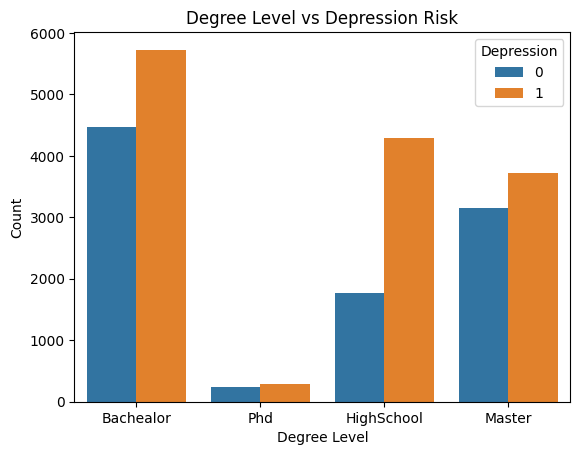

In [79]:
sn.countplot(x='Degree', hue='Depression', data=std_trainset)
plt.title('Degree Level vs Depression Risk')
plt.xlabel('Degree Level')
plt.ylabel('Count')
plt.show()

In [80]:
std_trainset["City"].value_counts()

City
Kalyan           1569
Srinagar         1370
Hyderabad        1339
Vasai-Virar      1289
Lucknow          1152
Thane            1139
Ludhiana         1111
Agra             1094
Surat            1078
Kolkata          1061
Jaipur           1035
Patna            1005
Visakhapatnam     969
Pune              967
Ahmedabad         946
Bhopal            933
Chennai           884
Meerut            823
Rajkot            813
Delhi             767
Bangalore         766
Ghaziabad         743
Mumbai            696
Vadodara          692
Varanasi          685
Nagpur            649
Indore            642
Kanpur            608
Nashik            547
Faridabad         460
Mira                1
Harsh               1
Rashi               1
Nalyan              1
Khaziabad           1
Name: count, dtype: int64

In [81]:
# Eğitim seviyesine göre depresyon riski yüzdesini hesaplamak
depression_by_degree = std_trainset.groupby('City')['Depression'].value_counts(normalize=True).unstack() * 100

depression_by_degree_sorted = depression_by_degree[1].sort_values(ascending=False)

# Sıralanmış sonucu görmek
print(depression_by_degree_sorted)

City
Mira             100.000000
Harsh            100.000000
Khaziabad        100.000000
Ahmedabad         67.230444
Hyderabad         66.990291
Patna             63.283582
Rajkot            62.484625
Bhopal            61.950697
Delhi             61.016949
Kolkata           60.885957
Bangalore         60.835509
Indore            60.591900
Meerut            59.781288
Chennai           59.728507
Kalyan            59.464627
Thane             59.086918
Faridabad         58.695652
Ludhiana          58.235824
Surat             57.977737
Ghaziabad         57.335128
Vasai-Virar       57.331265
Visakhapatnam     56.965944
Vadodara          56.213873
Pune              55.946225
Nagpur            55.778120
Srinagar          55.620438
Lucknow           55.468750
Mumbai            55.316092
Kanpur            54.276316
Agra              53.473492
Varanasi          53.138686
Nashik            52.833638
Jaipur            52.463768
Nalyan                  NaN
Rashi                   NaN
Name: 1, dtype:

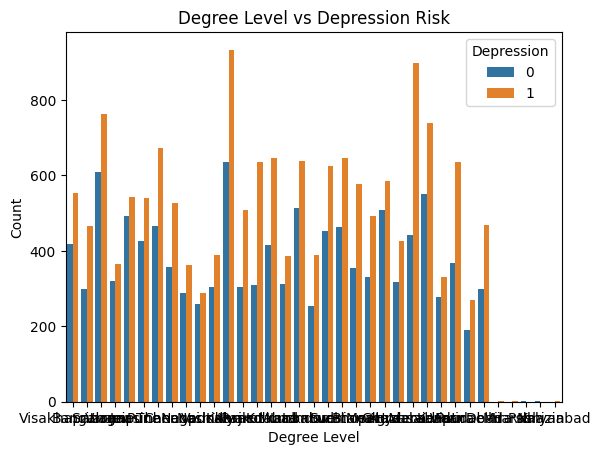

In [82]:
sn.countplot(x='City', hue='Depression', data=std_trainset)
plt.title('Degree Level vs Depression Risk')
plt.xlabel('Degree Level')
plt.ylabel('Count')
plt.show()

In [83]:
std_trainset["City"].unique()

array(['Visakhapatnam', 'Bangalore', 'Srinagar', 'Varanasi', 'Jaipur',
       'Pune', 'Thane', 'Chennai', 'Nagpur', 'Nashik', 'Vadodara',
       'Kalyan', 'Rajkot', 'Ahmedabad', 'Kolkata', 'Mumbai', 'Lucknow',
       'Indore', 'Surat', 'Ludhiana', 'Bhopal', 'Meerut', 'Agra',
       'Ghaziabad', 'Hyderabad', 'Vasai-Virar', 'Kanpur', 'Patna',
       'Faridabad', 'Delhi', 'Mira', 'Harsh', 'Rashi', 'Nalyan',
       'Khaziabad'], dtype=object)

Vasai-Virar >> Mumbai
Rashi şehir değil
Nalyan da değil

In [84]:
a = std_trainset [ (std_trainset["Degree"] ==  "HighSchool") & (std_trainset["Age"] > 40)  ]
a

,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
5569,Female,42.0,Rajkot,2.0,9.03,5.0,More than 8 hours,Moderate,HighSchool,Yes,3.0,1.0,Yes,0
14768,Female,58.0,Chennai,4.0,8.58,1.0,7-8 hours,Healthy,HighSchool,No,4.0,4.0,No,0
17213,Male,49.0,Nagpur,3.0,6.47,3.0,5-6 hours,Moderate,HighSchool,Yes,2.0,1.0,Yes,0
118005,Male,42.0,Ludhiana,5.0,5.32,4.0,7-8 hours,Unhealthy,HighSchool,No,12.0,5.0,Yes,1
126970,Female,48.0,Rajkot,3.0,5.32,4.0,7-8 hours,Unhealthy,HighSchool,No,1.0,4.0,Yes,1
130893,Male,41.0,Patna,3.0,5.85,1.0,5-6 hours,Moderate,HighSchool,No,11.0,5.0,Yes,1


In [85]:
std_trainset = std_trainset[~(std_trainset["Degree"] ==  "HighSchool") & (std_trainset["Age"] > 20)]

In [86]:
std_trainset.shape

(21707, 14)

In [87]:
a = std_trainset [ (std_trainset["Degree"] ==  "HighSchool")  ]
a

,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression


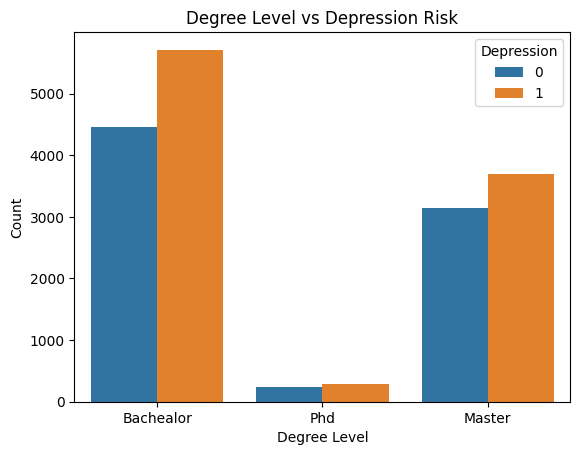

In [88]:
sn.countplot(x='Degree', hue='Depression', data=std_trainset)
plt.title('Degree Level vs Depression Risk')
plt.xlabel('Degree Level')
plt.ylabel('Count')
plt.show()

In [89]:
# Eğitim seviyesine göre depresyon riski yüzdesini hesaplamak
depression_by_degree = std_trainset.groupby('Degree')['Depression'].value_counts(normalize=True).unstack() * 100

# Depresyon riski yüzdelerini göster
print(depression_by_degree)


Depression          0          1
Degree                          
Bachealor   43.840330  56.159670
Master      45.877193  54.122807
Phd         45.192308  54.807692


In [90]:
depression_by_city = std_trainset.groupby(['City', 'Depression']).size().unstack(fill_value=0)
depression_by_city_count = depression_by_city[1]
depression_by_city_count_sorted = depression_by_city_count

# Sonuçları yazdır
print(depression_by_city_count_sorted)

City
Agra             448
Ahmedabad        408
Bangalore        273
Bhopal           417
Chennai          359
Delhi            309
Faridabad        183
Ghaziabad        338
Harsh              1
Hyderabad        711
Indore           223
Jaipur           479
Kalyan           767
Kanpur           240
Khaziabad          1
Kolkata          449
Lucknow          483
Ludhiana         386
Meerut           391
Mumbai           258
Nagpur           256
Nalyan             0
Nashik           242
Patna            518
Pune             386
Rajkot           363
Rashi              0
Srinagar         563
Surat            449
Thane            491
Vadodara         299
Varanasi         273
Vasai-Virar      554
Visakhapatnam    448
Name: 1, dtype: int64


In [91]:
result = std_trainset.groupby(['City', 'Depression']).size().unstack(fill_value=0)

# Depression = 1'in oranını ekleme
result['Total'] = result[0] + result[1]
result['Depression_1_Ratio'] = (result[1] / result['Total']) * 100

# Son tablo
result = result.rename(columns={0: 'Depression_0_Count', 1: 'Depression_1_Count'})
result = result[['Depression_0_Count', 'Depression_1_Count']].reset_index()

print(result)

Depression           City  Depression_0_Count  Depression_1_Count
0                    Agra                 433                 448
1               Ahmedabad                 234                 408
2               Bangalore                 228                 273
3                  Bhopal                 304                 417
4                 Chennai                 275                 359
5                   Delhi                 253                 309
6               Faridabad                 150                 183
7               Ghaziabad                 276                 338
8                   Harsh                   0                   1
9               Hyderabad                 370                 711
10                 Indore                 189                 223
11                 Jaipur                 460                 479
12                 Kalyan                 563                 767
13                 Kanpur                 229                 240
14        

Ahmedabad

In [92]:
std_trainset = std_trainset[~(std_trainset['City'] == "Rashi") |
                            (std_trainset['City'] == "Nalyan") |
                            (std_trainset['City'] == "Khaziabad") |
                            (std_trainset['City'] == "Harsh") ]

In [93]:
depresyon_oranları = std_trainset.groupby('City')['Depression'].mean()

In [94]:
city_score_mapping = {
    'Ahmedabad': 67,
    'Hyderabad': 67,
    'Patna': 63,
    'Rajkot': 62,
    'Bhopal': 62,
    'Kolkata': 61,
    'Bangalore': 61,
    'Indore': 60,
    'Delhi': 60,
    'Meerut': 60,
    'Chennai': 59,
    'Kalyan': 59,
    'Thane': 59,
    'Surat': 58,
    'Faridabad': 58,
    'Ludhiana': 58,
    'Ghaziabad': 57,
    'Visakhapatnam': 57,
    'Vasai-Virar': 57,
    'Vadodara': 56,
    'Pune': 56,
    'Nagpur': 56,
    'Lucknow': 55,
    'Srinagar': 55,
    'Mumbai': 55,
    'Kanpur': 55,
    'Agra': 53,
    'Varanasi': 53,
    'Nashik': 52,
    'Jaipur': 52,
    'Nashik' : 51,
    'Agra' : 51,
    'Mumbai' : 50,
    'Varanasi': 49
}
# Mapleme sonucunu kontrol etme
std_trainset['City'] = std_trainset['City'].map(city_score_mapping)

std_trainset.value_counts()

Gender  Age   City  Academic Pressure  CGPA  Study Satisfaction  Sleep Duration     Dietary Habits  Degree     Have you ever had suicidal thoughts ?  Work/Study Hours  Financial Stress  Family History of Mental Illness  Depression
Female  21.0  49.0  2.0                6.89  2.0                 5-6 hours          Unhealthy       Master     Yes                                    11.0              5.0               No                                1             1
Male    26.0  61.0  3.0                9.96  2.0                 7-8 hours          Unhealthy       Bachealor  Yes                                    5.0               5.0               No                                1             1
                    5.0                5.85  1.0                 7-8 hours          Unhealthy       Bachealor  No                                     6.0               5.0               No                                1             1
                    4.0                9.96  2.0             

In [95]:
std_trainset.sample(5)

,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
99337,Male,24.0,63.0,3.0,10.00,1.0,7-8 hours,Unhealthy,Bachealor,Yes,0.0,5.0,No,1
121686,Female,23.0,55.0,2.0,7.21,3.0,5-6 hours,Unhealthy,Bachealor,No,2.0,2.0,No,0
68317,Female,28.0,61.0,4.0,6.02,3.0,More than 8 hours,Healthy,Bachealor,No,2.0,3.0,No,0
46677,Male,24.0,58.0,4.0,9.74,2.0,Less than 5 hours,Moderate,Master,No,7.0,4.0,Yes,1
121204,Male,21.0,59.0,3.0,9.95,1.0,7-8 hours,Unhealthy,Bachealor,No,0.0,2.0,Yes,1


In [96]:
std_trainset["Sleep Duration"].value_counts()

Sleep Duration
Less than 5 hours    6481
7-8 hours            5756
5-6 hours            4854
More than 8 hours    4614
40-45 hours             1
Name: count, dtype: int64

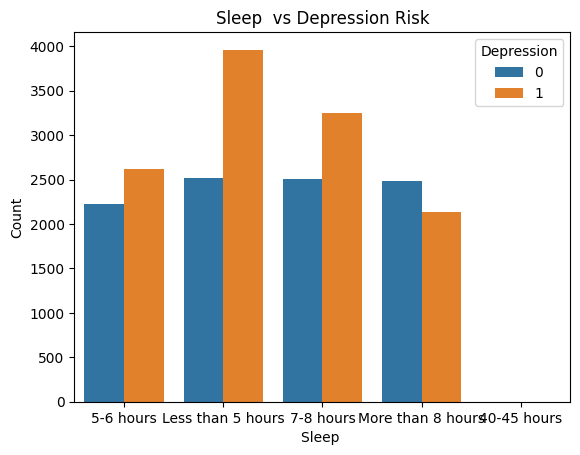

In [97]:
sn.countplot(x='Sleep Duration', hue='Depression', data=std_trainset)
plt.title('Sleep  vs Depression Risk')
plt.xlabel('Sleep ')
plt.ylabel('Count')
plt.show()

In [ ]:
# Eğitim seviyesine göre depresyon riski yüzdesini hesaplamak
depression_by_sleep = std_trainset.groupby('Sleep Duration')['Depression'].value_counts(normalize=True).unstack() * 100

depression_by_sleep_sorted = depression_by_sleep[1].sort_values(ascending=False)

# Sıralanmış sonucu görmek
print(depression_by_sleep_sorted)

Sleep Duration
40-45 hours          100.000000
Less than 5 hours     61.132541
7-8 hours             56.445448
5-6 hours             54.058508
More than 8 hours     46.163849
Name: 1, dtype: float64


In [99]:
sleep_mapping = {
    'Less than 5 hours' : 3,
    '7-8 hours': 2,
    '5-6 hours':1,
    'More than 8 hours':0
}

# Veriye uygulama
std_trainset['Sleep Duration'] = std_trainset['Sleep Duration'].map(sleep_mapping)

In [100]:
std_trainset['Sleep Duration'].unique()

array([ 1.,  3.,  2.,  0., nan])

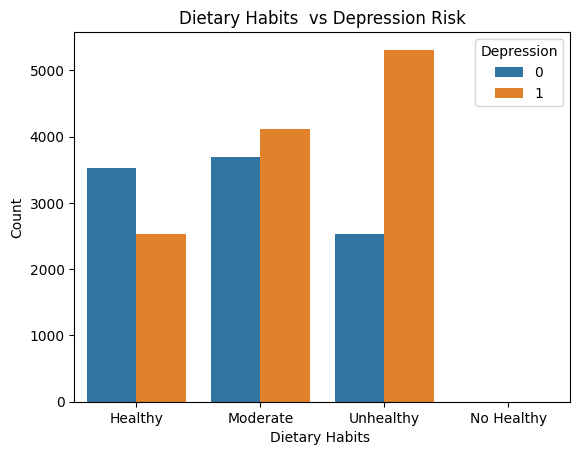

In [101]:
sn.countplot(x='Dietary Habits', hue='Depression', data=std_trainset)
plt.title('Dietary Habits  vs Depression Risk')
plt.xlabel('Dietary Habits ')
plt.ylabel('Count')
plt.show()


Beslenme Alışkanlıklarına Göre Depresyon Oranı (%):
Dietary Habits
Healthy        41.833196
Moderate       52.759636
No Healthy    100.000000
Unhealthy      67.746461
Name: Depression, dtype: float64


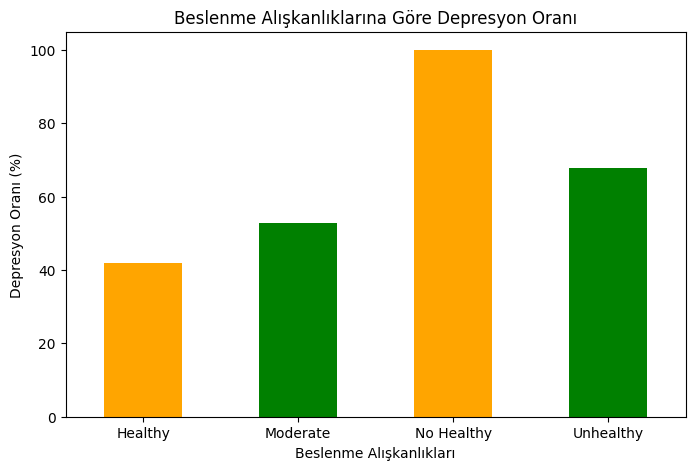

In [102]:
# Beslenme Alışkanlıklarına Göre Depresyon Oranını Hesaplama
depression_rate = std_trainset.groupby('Dietary Habits')['Depression'].mean() * 100

# Sonuçları Görüntüleme
print("Beslenme Alışkanlıklarına Göre Depresyon Oranı (%):")
print(depression_rate)

# Görsel Olarak Depresyon Oranı Dağılımı
plt.figure(figsize=(8, 5))
depression_rate.plot(kind='bar', color=['orange', 'green'])
plt.title("Beslenme Alışkanlıklarına Göre Depresyon Oranı")
plt.ylabel("Depresyon Oranı (%)")
plt.xlabel("Beslenme Alışkanlıkları")
plt.xticks(rotation=0)
plt.show()

In [103]:
# Gerekli kategorileri seçmek için filtreleme
filtered_data = std_trainset[std_trainset['Dietary Habits'].isin(['Unhealthy', 'Moderate', 'Healthy'])]

# Filtrelenmiş veriyi görüntüleme
print("Filtrelenmiş Veri:")
print(filtered_data['Dietary Habits'].value_counts())


Filtrelenmiş Veri:
Dietary Habits
Unhealthy    7841
Moderate     7809
Healthy      6055
Name: count, dtype: int64


In [ ]:

# Beslenme alışkanlıkları için sıralı bir encoding mappingi oluşturma
diet_mapping = {
    'Healthy': 0,        # Sağlıklı beslenme en düşük öneme sahip
    'Moderate': 1,       # Orta seviyede
    'Unhealthy': 2       # Sağlıksız beslenme en yüksek öneme sahip
}

# Veriye bu encodingi uygulama
std_trainset['Dietary Habits Encoded'] = std_trainset['Dietary Habits'].map(diet_mapping)

# Encoding sonrasında yeni veriyi gösterme
print(std_trainset[['Dietary Habits', 'Dietary Habits Encoded']].head())

# Filtrelenmiş veri üzerinde encoding işlemi (sadece Healthy, Moderate, Unhealthy olanlar)
filtered_data['Dietary Habits Encoded'] = filtered_data['Dietary Habits'].map(diet_mapping)


   Dietary Habits  Dietary Habits Encoded
2         Healthy                     0.0
8        Moderate                     1.0
26        Healthy                     0.0
30       Moderate                     1.0
32       Moderate                     1.0


C:\Users\ulasu\AppData\Local\Temp\ipykernel_22948\3741031554.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Dietary Habits Encoded'] = filtered_data['Dietary Habits'].map(diet_mapping)


In [105]:
# Suicidal thoughts ve Family history of mental illness için binary encoding
std_trainset['Have you ever had suicidal thoughts ?'] = std_trainset['Have you ever had suicidal thoughts ?'].map({'Yes': 1, 'No': 0})
std_trainset['Family History of Mental Illness'] = std_trainset['Family History of Mental Illness'].map({'Yes': 1, 'No': 0})

# Kontrol etmek için ilk 5 satırı gözlemleyebilirsiniz
print(std_trainset.head())


    Gender   Age  City  Academic Pressure  CGPA  Study Satisfaction  \
2     Male  33.0  57.0                5.0  8.97                 2.0   
8   Female  24.0  61.0                2.0  5.90                 5.0   
26    Male  31.0  55.0                3.0  7.03                 5.0   
30  Female  28.0  49.0                3.0  5.59                 2.0   
32  Female  25.0  52.0                4.0  8.13                 3.0   

    Sleep Duration Dietary Habits     Degree  \
2              1.0        Healthy  Bachealor   
8              1.0       Moderate  Bachealor   
26             3.0        Healthy  Bachealor   
30             2.0       Moderate  Bachealor   
32             1.0       Moderate        NaN   

    Have you ever had suicidal thoughts ?  Work/Study Hours  Financial Stress  \
2                                       1               3.0               1.0   
8                                       0               3.0               2.0   
26                                      0

In [106]:
std_trainset = std_trainset.drop(columns=['Dietary Habits'])

In [107]:
print(std_trainset.head())


    Gender   Age  City  Academic Pressure  CGPA  Study Satisfaction  \
2     Male  33.0  57.0                5.0  8.97                 2.0   
8   Female  24.0  61.0                2.0  5.90                 5.0   
26    Male  31.0  55.0                3.0  7.03                 5.0   
30  Female  28.0  49.0                3.0  5.59                 2.0   
32  Female  25.0  52.0                4.0  8.13                 3.0   

    Sleep Duration     Degree  Have you ever had suicidal thoughts ?  \
2              1.0  Bachealor                                      1   
8              1.0  Bachealor                                      0   
26             3.0  Bachealor                                      0   
30             2.0  Bachealor                                      1   
32             1.0        NaN                                      1   

    Work/Study Hours  Financial Stress  Family History of Mental Illness  \
2                3.0               1.0                          

In [108]:
# Cinsiyet ve depresyon durumuna göre gruplama
gender_depression = std_trainset.groupby('Gender')['Depression'].value_counts(normalize=True).unstack().fillna(0) * 100

# Sonuçları yazdırma
print(gender_depression)

Depression          0          1
Gender                          
Female      44.997916  55.002084
Male        44.772915  55.227085


In [109]:
# Cinsiyet sütununu veri setinden kaldırma
std_trainset = std_trainset.drop(columns=['Gender'])

# Son hali kontrol etme
print(std_trainset.head())


     Age  City  Academic Pressure  CGPA  Study Satisfaction  Sleep Duration  \
2   33.0  57.0                5.0  8.97                 2.0             1.0   
8   24.0  61.0                2.0  5.90                 5.0             1.0   
26  31.0  55.0                3.0  7.03                 5.0             3.0   
30  28.0  49.0                3.0  5.59                 2.0             2.0   
32  25.0  52.0                4.0  8.13                 3.0             1.0   

       Degree  Have you ever had suicidal thoughts ?  Work/Study Hours  \
2   Bachealor                                      1               3.0   
8   Bachealor                                      0               3.0   
26  Bachealor                                      0               9.0   
30  Bachealor                                      1               4.0   
32        NaN                                      1               1.0   

    Financial Stress  Family History of Mental Illness  Depression  \
2         

In [110]:
# Degree ve Depression'a göre gruplama ve oranları hesaplama
degree_depression = std_trainset.groupby('Degree')['Depression'].value_counts(normalize=True).unstack().fillna(0) * 100

# Sonuçları yazdırma
print(degree_depression)


Depression          0          1
Degree                          
Bachealor   43.834808  56.165192
Master      45.877193  54.122807
Phd         45.192308  54.807692


In [111]:
std_trainset = std_trainset.drop(columns=['Degree'])

In [112]:
std_trainset.sample(5)


,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Dietary Habits Encoded
90634,37.0,61.0,1.0,9.41,3.0,1.0,0,0.0,4.0,1,0,1.0
120040,21.0,51.0,1.0,6.99,2.0,3.0,0,8.0,4.0,0,0,2.0
130803,25.0,57.0,3.0,8.62,1.0,2.0,1,10.0,3.0,0,1,2.0
119982,27.0,51.0,4.0,8.92,2.0,0.0,1,5.0,5.0,0,1,0.0
9371,32.0,55.0,5.0,5.88,4.0,2.0,1,9.0,3.0,1,1,1.0


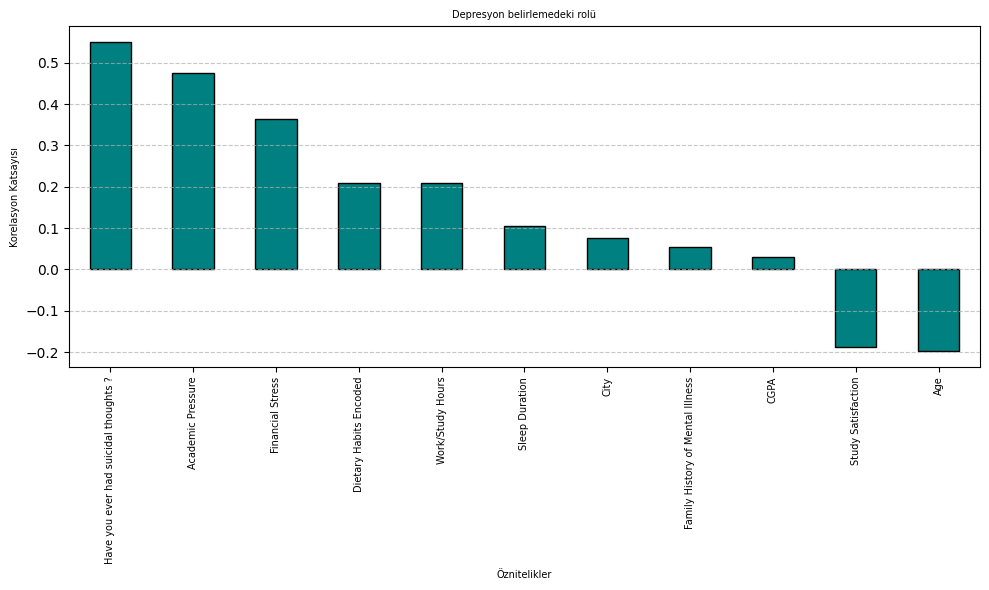

In [113]:
# Depresyon ile diğer özniteliklerin korelasyonunu hesaplama
correlation_with_target_std = std_trainset.corr()["Depression"].drop("Depression")

# Bar grafiği ile görselleştirme
plt.figure(figsize=(10, 6))
correlation_with_target_std.sort_values(ascending=False).plot(kind="bar", color="teal", edgecolor="black")
plt.title("Depresyon belirlemedeki rolü", fontsize=7)
plt.xlabel("Öznitelikler", fontsize=7)
plt.ylabel("Korelasyon Katsayısı", fontsize=7)
plt.xticks(rotation=90, fontsize=7)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

In [114]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

In [115]:
X = std_trainset.drop('Depression', axis=1)  # Özellikler
y = std_trainset['Depression']  # Hedef değişken

# Eğitim ve test verisine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [116]:
from lightgbm import LGBMClassifier
from lightgbm.callback import early_stopping
from sklearn.metrics import accuracy_score, classification_report

# Model oluştur
model = LGBMClassifier(
    objective='binary',
    metric='binary_error',
    boosting_type='gbdt',
    num_leaves=31,
    learning_rate=0.05,
    feature_fraction=0.8,
    n_estimators=1000,  # Maksimum ağaç sayısı
    random_state=42
)

# Modeli eğit
model.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],  # Değerlendirme seti
    eval_metric='binary_error',
    callbacks=[early_stopping(stopping_rounds=50)]
)

# Tahmin yap
y_pred = model.predict(X_test)

# Performans değerlendirme
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Info] Number of positive: 9572, number of negative: 7792
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001050 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 319
[LightGBM] [Info] Number of data points in the train set: 17364, number of used features: 11
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg

In [118]:
from lightgbm import early_stopping, log_evaluation
from sklearn.metrics import accuracy_score
from lightgbm import LGBMClassifier
import optuna

def objective(trial):
    params = {
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1, log=True),
        'num_leaves': trial.suggest_int('num_leaves', 50, 200),
        'feature_fraction': trial.suggest_float('feature_fraction', 0.6, 0.9),
        'bagging_fraction': trial.suggest_float('bagging_fraction', 0.6, 0.9),
        'max_depth': trial.suggest_int('max_depth', 3, 12),
        'lambda_l1': trial.suggest_float('lambda_l1', 1e-8, 10.0, log=True),
        'lambda_l2': trial.suggest_float('lambda_l2', 1e-8, 10.0, log=True),
        'min_child_samples': trial.suggest_int('min_child_samples', 20, 100)
    }

    model = LGBMClassifier(**params, n_estimators=1000, random_state=42)

    model.fit(X_train, y_train, eval_set=[(X_test, y_test)], eval_metric='binary_error',
              callbacks=[early_stopping(stopping_rounds=50), log_evaluation(10)])

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Optuna optimize function
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

# Get best parameters
best_params = study.best_params
print("Best parameters:", best_params)


C:\Users\ulasu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2025-01-03 12:52:58,362] A new study created in memory with name: no-name-7197fe67-d1dc-4440-a32b-fc0c8669b0e2


[LightGBM] [Warning] feature_fraction is set=0.7366004668267248, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7366004668267248
[LightGBM] [Warning] lambda_l1 is set=6.829229237923186e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.829229237923186e-07
[LightGBM] [Warning] lambda_l2 is set=0.0009696164978620379, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0009696164978620379
[LightGBM] [Warning] bagging_fraction is set=0.754486439941697, subsample=1.0 will be ignored. Current value: bagging_fraction=0.754486439941697
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.7366004668267248, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7366004668267248
[LightGBM] [Warning] lambda_l1 is set=6.829229237923186e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.829229237923186e-07
[LightGBM] [Warning] lambda_l2 is set=0.000969616

[I 2025-01-03 12:52:58,988] Trial 0 finished with value: 0.8475356978350991 and parameters: {'learning_rate': 0.05404797224115507, 'num_leaves': 200, 'feature_fraction': 0.7366004668267248, 'bagging_fraction': 0.754486439941697, 'max_depth': 7, 'lambda_l1': 6.829229237923186e-07, 'lambda_l2': 0.0009696164978620379, 'min_child_samples': 86}. Best is trial 0 with value: 0.8475356978350991.


[LightGBM] [Warning] feature_fraction is set=0.6485387933350505, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6485387933350505
[LightGBM] [Warning] lambda_l1 is set=0.25428784873195404, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.25428784873195404
[LightGBM] [Warning] lambda_l2 is set=0.0006794650180059516, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0006794650180059516
[LightGBM] [Warning] bagging_fraction is set=0.7166101817316134, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7166101817316134
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.6485387933350505, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6485387933350505
[LightGBM] [Warning] lambda_l1 is set=0.25428784873195404, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.25428784873195404
[LightGBM] [Warning] lambda_l2 is set=0.000679465018005

[I 2025-01-03 12:53:00,061] Trial 1 finished with value: 0.8509903270382312 and parameters: {'learning_rate': 0.02318843256311164, 'num_leaves': 148, 'feature_fraction': 0.6485387933350505, 'bagging_fraction': 0.7166101817316134, 'max_depth': 12, 'lambda_l1': 0.25428784873195404, 'lambda_l2': 0.0006794650180059516, 'min_child_samples': 30}. Best is trial 1 with value: 0.8509903270382312.


[160]	valid_0's binary_error: 0.151082	valid_0's binary_logloss: 0.36173
[170]	valid_0's binary_error: 0.151543	valid_0's binary_logloss: 0.360747
Early stopping, best iteration is:
[120]	valid_0's binary_error: 0.14901	valid_0's binary_logloss: 0.374468
[LightGBM] [Warning] feature_fraction is set=0.6485387933350505, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6485387933350505
[LightGBM] [Warning] lambda_l1 is set=0.25428784873195404, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.25428784873195404
[LightGBM] [Warning] lambda_l2 is set=0.0006794650180059516, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0006794650180059516
[LightGBM] [Warning] bagging_fraction is set=0.7166101817316134, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7166101817316134
[LightGBM] [Warning] feature_fraction is set=0.783999456124113, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.783999456124113
[LightGBM] [Warni

[I 2025-01-03 12:53:01,186] Trial 2 finished with value: 0.8479963150621833 and parameters: {'learning_rate': 0.024112486124360986, 'num_leaves': 148, 'feature_fraction': 0.783999456124113, 'bagging_fraction': 0.8937085096719659, 'max_depth': 12, 'lambda_l1': 2.0954047483422004e-08, 'lambda_l2': 0.0003553180279538904, 'min_child_samples': 23}. Best is trial 1 with value: 0.8509903270382312.


[160]	valid_0's binary_error: 0.154767	valid_0's binary_logloss: 0.360243
Early stopping, best iteration is:
[114]	valid_0's binary_error: 0.152004	valid_0's binary_logloss: 0.368
[LightGBM] [Warning] feature_fraction is set=0.783999456124113, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.783999456124113
[LightGBM] [Warning] lambda_l1 is set=2.0954047483422004e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.0954047483422004e-08
[LightGBM] [Warning] lambda_l2 is set=0.0003553180279538904, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0003553180279538904
[LightGBM] [Warning] bagging_fraction is set=0.8937085096719659, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8937085096719659
[LightGBM] [Warning] feature_fraction is set=0.7639534544196328, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7639534544196328
[LightGBM] [Warning] lambda_l1 is set=2.652637007840875e-07, reg_alpha=0.0 will be ign

[I 2025-01-03 12:53:01,664] Trial 3 finished with value: 0.8528327959465684 and parameters: {'learning_rate': 0.041958645193472095, 'num_leaves': 92, 'feature_fraction': 0.7639534544196328, 'bagging_fraction': 0.6696342637968038, 'max_depth': 3, 'lambda_l1': 2.652637007840875e-07, 'lambda_l2': 0.017702509521921237, 'min_child_samples': 88}. Best is trial 3 with value: 0.8528327959465684.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[320]	valid_0's binary_error: 0.149931	valid_0's binary_logloss: 0.351094
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fu

[I 2025-01-03 12:53:02,412] Trial 4 finished with value: 0.8463841547673883 and parameters: {'learning_rate': 0.050516995443237865, 'num_leaves': 136, 'feature_fraction': 0.8830433400554736, 'bagging_fraction': 0.8058260317210117, 'max_depth': 12, 'lambda_l1': 0.00030072196724141185, 'lambda_l2': 0.051848495756051674, 'min_child_samples': 93}. Best is trial 3 with value: 0.8528327959465684.


[LightGBM] [Warning] feature_fraction is set=0.8830433400554736, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8830433400554736
[LightGBM] [Warning] lambda_l1 is set=0.00030072196724141185, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00030072196724141185
[LightGBM] [Warning] lambda_l2 is set=0.051848495756051674, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.051848495756051674
[LightGBM] [Warning] bagging_fraction is set=0.8058260317210117, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8058260317210117
[LightGBM] [Warning] feature_fraction is set=0.8606527317943964, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8606527317943964
[LightGBM] [Warning] lambda_l1 is set=0.2573072764828615, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.2573072764828615
[LightGBM] [Warning] lambda_l2 is set=0.00013657483327419767, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.000136574833

[I 2025-01-03 12:53:03,139] Trial 5 finished with value: 0.8509903270382312 and parameters: {'learning_rate': 0.04171017346276495, 'num_leaves': 107, 'feature_fraction': 0.8606527317943964, 'bagging_fraction': 0.736578717905902, 'max_depth': 7, 'lambda_l1': 0.2573072764828615, 'lambda_l2': 0.00013657483327419767, 'min_child_samples': 39}. Best is trial 3 with value: 0.8528327959465684.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[150]	valid_0's binary_error: 0.150392	valid_0's binary_logloss: 0.357716
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[160]	valid_0's binary_err

[I 2025-01-03 12:53:03,595] Trial 6 finished with value: 0.8475356978350991 and parameters: {'learning_rate': 0.04961013549963368, 'num_leaves': 73, 'feature_fraction': 0.8181563383387874, 'bagging_fraction': 0.7713545991418527, 'max_depth': 8, 'lambda_l1': 0.0628086251475808, 'lambda_l2': 1.4996213091956544e-05, 'min_child_samples': 28}. Best is trial 3 with value: 0.8528327959465684.


[90]	valid_0's binary_error: 0.154537	valid_0's binary_logloss: 0.358208
[100]	valid_0's binary_error: 0.155689	valid_0's binary_logloss: 0.35751
[110]	valid_0's binary_error: 0.155458	valid_0's binary_logloss: 0.356697
[120]	valid_0's binary_error: 0.155458	valid_0's binary_logloss: 0.356963
Early stopping, best iteration is:
[74]	valid_0's binary_error: 0.152464	valid_0's binary_logloss: 0.361133
[LightGBM] [Warning] feature_fraction is set=0.8181563383387874, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8181563383387874
[LightGBM] [Warning] lambda_l1 is set=0.0628086251475808, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0628086251475808
[LightGBM] [Warning] lambda_l2 is set=1.4996213091956544e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.4996213091956544e-05
[LightGBM] [Warning] bagging_fraction is set=0.7713545991418527, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7713545991418527
[LightGBM] [Warning] f

[I 2025-01-03 12:53:03,990] Trial 7 finished with value: 0.8507600184246891 and parameters: {'learning_rate': 0.05804710277655687, 'num_leaves': 144, 'feature_fraction': 0.7247066507401031, 'bagging_fraction': 0.6367531419669215, 'max_depth': 5, 'lambda_l1': 1.9543593367447942e-07, 'lambda_l2': 0.023525587465897207, 'min_child_samples': 60}. Best is trial 3 with value: 0.8528327959465684.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[130]	valid_0's binary_error: 0.150392	valid_0's binary_logloss: 0.353013
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fu

[I 2025-01-03 12:53:04,691] Trial 8 finished with value: 0.8454629203132197 and parameters: {'learning_rate': 0.010363905253067, 'num_leaves': 113, 'feature_fraction': 0.8403899300065576, 'bagging_fraction': 0.745821602243483, 'max_depth': 11, 'lambda_l1': 1.7601280766217514e-08, 'lambda_l2': 0.003069867806867862, 'min_child_samples': 49}. Best is trial 3 with value: 0.8528327959465684.


[120]	valid_0's binary_error: 0.157992	valid_0's binary_logloss: 0.426459
[130]	valid_0's binary_error: 0.155919	valid_0's binary_logloss: 0.417771
[140]	valid_0's binary_error: 0.15661	valid_0's binary_logloss: 0.410382
Early stopping, best iteration is:
[90]	valid_0's binary_error: 0.154537	valid_0's binary_logloss: 0.45749
[LightGBM] [Warning] feature_fraction is set=0.8403899300065576, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8403899300065576
[LightGBM] [Warning] lambda_l1 is set=1.7601280766217514e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.7601280766217514e-08
[LightGBM] [Warning] lambda_l2 is set=0.003069867806867862, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.003069867806867862
[LightGBM] [Warning] bagging_fraction is set=0.745821602243483, subsample=1.0 will be ignored. Current value: bagging_fraction=0.745821602243483
[LightGBM] [Warning] feature_fraction is set=0.865878219598597, colsample_bytree=1.0 will be i

[I 2025-01-03 12:53:05,344] Trial 9 finished with value: 0.8493781667434362 and parameters: {'learning_rate': 0.027574476310826393, 'num_leaves': 176, 'feature_fraction': 0.865878219598597, 'bagging_fraction': 0.6243500224181454, 'max_depth': 7, 'lambda_l1': 3.4718416730111166, 'lambda_l2': 0.001745410871992092, 'min_child_samples': 99}. Best is trial 3 with value: 0.8528327959465684.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[170]	valid_0's binary_error: 0.151313	valid_0's binary_logloss: 0.35644
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[180]	valid_0's binary_erro

[I 2025-01-03 12:53:05,614] Trial 10 finished with value: 0.8516812528788577 and parameters: {'learning_rate': 0.09767258878791563, 'num_leaves': 54, 'feature_fraction': 0.6007651952550739, 'bagging_fraction': 0.6768298158856739, 'max_depth': 3, 'lambda_l1': 1.7829899801132612e-05, 'lambda_l2': 7.991518025892905, 'min_child_samples': 80}. Best is trial 3 with value: 0.8528327959465684.


[LightGBM] [Warning] feature_fraction is set=0.6007651952550739, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6007651952550739
[LightGBM] [Warning] lambda_l1 is set=1.7829899801132612e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.7829899801132612e-05
[LightGBM] [Warning] lambda_l2 is set=7.991518025892905, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.991518025892905
[LightGBM] [Warning] bagging_fraction is set=0.6768298158856739, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6768298158856739
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.6007651952550739, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6007651952550739
[LightGBM] [Warning] lambda_l1 is set=1.7829899801132612e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.7829899801132612e-05
[LightGBM] [Warning] lambda_l2 is set=7.99151802589

[I 2025-01-03 12:53:05,934] Trial 11 finished with value: 0.852141870105942 and parameters: {'learning_rate': 0.09449928098546612, 'num_leaves': 50, 'feature_fraction': 0.6211476095596826, 'bagging_fraction': 0.6753639199959642, 'max_depth': 3, 'lambda_l1': 2.059040962925671e-05, 'lambda_l2': 0.8471144814346622, 'min_child_samples': 79}. Best is trial 3 with value: 0.8528327959465684.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[200]	valid_0's binary_error: 0.14947	valid_0's binary_logloss: 0.350021
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

[I 2025-01-03 12:53:06,225] Trial 12 finished with value: 0.8514509442653155 and parameters: {'learning_rate': 0.09762486457341606, 'num_leaves': 84, 'feature_fraction': 0.686931995207585, 'bagging_fraction': 0.669426528592107, 'max_depth': 3, 'lambda_l1': 9.099660942425023e-06, 'lambda_l2': 3.677859598759001e-08, 'min_child_samples': 77}. Best is trial 3 with value: 0.8528327959465684.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[90]	valid_0's binary_error: 0.152004	valid_0's binary_logloss: 0.354127
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

[I 2025-01-03 12:53:07,013] Trial 13 finished with value: 0.8486872409028098 and parameters: {'learning_rate': 0.016296589542617822, 'num_leaves': 59, 'feature_fraction': 0.7860714041114449, 'bagging_fraction': 0.6729193728212691, 'max_depth': 5, 'lambda_l1': 0.0004788163106648836, 'lambda_l2': 3.5336436510954767, 'min_child_samples': 69}. Best is trial 3 with value: 0.8528327959465684.


[LightGBM] [Warning] feature_fraction is set=0.7860714041114449, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7860714041114449
[LightGBM] [Warning] lambda_l1 is set=0.0004788163106648836, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0004788163106648836
[LightGBM] [Warning] lambda_l2 is set=3.5336436510954767, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.5336436510954767
[LightGBM] [Warning] bagging_fraction is set=0.6729193728212691, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6729193728212691
[LightGBM] [Warning] feature_fraction is set=0.6842908294287098, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6842908294287098
[LightGBM] [Warning] lambda_l1 is set=1.1608449240877054e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.1608449240877054e-05
[LightGBM] [Warning] lambda_l2 is set=0.22671083297056074, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2267108329705

[I 2025-01-03 12:53:07,424] Trial 14 finished with value: 0.8489175495163519 and parameters: {'learning_rate': 0.07115091424417021, 'num_leaves': 94, 'feature_fraction': 0.6842908294287098, 'bagging_fraction': 0.7034710460004707, 'max_depth': 5, 'lambda_l1': 1.1608449240877054e-05, 'lambda_l2': 0.22671083297056074, 'min_child_samples': 66}. Best is trial 3 with value: 0.8528327959465684.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[126]	valid_0's binary_error: 0.151082	valid_0's binary_logloss: 0.351937
[LightGBM] [Warning] feature_fraction is set=0.6842908294287098, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6842908294287098
[LightGBM] [Warning] lambda_l1 is set=1.1608449240877054e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.1608449240877054e-05
[LightGBM] [Warning] lambda_l2 is set=0.22671083297056074, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.22671083297056074
[LightGBM] [Warning] bagging_fraction is set=0.7034710460004707, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7034710460004707
[LightGBM] [Warning] feature_fraction is set=0.6344676532769162, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6344676532769162
[LightGBM] [Warning] lambda_l1 is set=0.0012046651909032719, reg_alpha=0.0 will be i

[I 2025-01-03 12:53:07,778] Trial 15 finished with value: 0.8473053892215568 and parameters: {'learning_rate': 0.0373893061788898, 'num_leaves': 73, 'feature_fraction': 0.6344676532769162, 'bagging_fraction': 0.6064297340123672, 'max_depth': 4, 'lambda_l1': 0.0012046651909032719, 'lambda_l2': 0.3794980468210718, 'min_child_samples': 90}. Best is trial 3 with value: 0.8528327959465684.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[70]	valid_0's binary_error: 0.157301	valid_0's binary_logloss: 0.391842
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

[I 2025-01-03 12:53:08,238] Trial 16 finished with value: 0.8473053892215568 and parameters: {'learning_rate': 0.07120772181912297, 'num_leaves': 52, 'feature_fraction': 0.787425599715153, 'bagging_fraction': 0.8027604539516935, 'max_depth': 9, 'lambda_l1': 3.552152259104338e-07, 'lambda_l2': 3.204811036593023e-06, 'min_child_samples': 77}. Best is trial 3 with value: 0.8528327959465684.


[70]	valid_0's binary_error: 0.152464	valid_0's binary_logloss: 0.356123
[80]	valid_0's binary_error: 0.153155	valid_0's binary_logloss: 0.355865
[90]	valid_0's binary_error: 0.153386	valid_0's binary_logloss: 0.354993
[100]	valid_0's binary_error: 0.152234	valid_0's binary_logloss: 0.355468
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[110]	valid_0's binary_error: 0.151773	valid_0's binary_logloss: 0.356086
[120]	valid_0's binary_error: 0.150622	valid_0's binary_logloss: 0.356172
[130]	valid_0's binary_error: 0.152464	valid_0's binary_logloss: 0.356061
[140]	valid_0's binary_error: 0.152004	valid_0's binary_logloss: 0.356634
Early stopping, best iteration is:
[91]	valid_0's binary_error: 0.152695	valid_0's binary_logloss: 0.354791
[LightGBM] [Warning] feature_fraction is set=0.787425599715153, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.787425599715153
[LightGBM] [Warning] lambda_l1 is set=3.552152259104338e-07, reg_alpha=0.0 w

[I 2025-01-03 12:53:08,717] Trial 17 finished with value: 0.8496084753569784 and parameters: {'learning_rate': 0.035610846876689854, 'num_leaves': 96, 'feature_fraction': 0.7144229513866368, 'bagging_fraction': 0.651037532165823, 'max_depth': 4, 'lambda_l1': 1.994305595899521e-06, 'lambda_l2': 1.07601865066022, 'min_child_samples': 57}. Best is trial 3 with value: 0.8528327959465684.


[LightGBM] [Warning] feature_fraction is set=0.7660313205338579, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7660313205338579
[LightGBM] [Warning] lambda_l1 is set=0.005614046699950022, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.005614046699950022
[LightGBM] [Warning] lambda_l2 is set=0.01796237468750464, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.01796237468750464
[LightGBM] [Warning] bagging_fraction is set=0.7001396694912192, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7001396694912192
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.7660313205338579, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7660313205338579
[LightGBM] [Warning] lambda_l1 is set=0.005614046699950022, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.005614046699950022
[LightGBM] [Warning] lambda_l2 is set=0.017962374687504

[I 2025-01-03 12:53:09,151] Trial 18 finished with value: 0.8438507600184247 and parameters: {'learning_rate': 0.018039627811031984, 'num_leaves': 121, 'feature_fraction': 0.7660313205338579, 'bagging_fraction': 0.7001396694912192, 'max_depth': 3, 'lambda_l1': 0.005614046699950022, 'lambda_l2': 0.01796237468750464, 'min_child_samples': 100}. Best is trial 3 with value: 0.8528327959465684.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[240]	valid_0's binary_error: 0.15638	valid_0's binary_logloss: 0.373863
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

[I 2025-01-03 12:53:09,597] Trial 19 finished with value: 0.8509903270382312 and parameters: {'learning_rate': 0.07673568896069742, 'num_leaves': 70, 'feature_fraction': 0.6918782787369508, 'bagging_fraction': 0.8586703627252581, 'max_depth': 6, 'lambda_l1': 0.0001121966687799211, 'lambda_l2': 0.12235915837907106, 'min_child_samples': 84}. Best is trial 3 with value: 0.8528327959465684.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[70]	valid_0's binary_error: 0.151313	valid_0's binary_logloss: 0.355526
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[80]	valid_0's binary_error: 0.150622	valid_0's binary_logloss: 0.355362
[LightGBM] [Warning] No furth

[I 2025-01-03 12:53:09,904] Trial 20 finished with value: 0.8401658222017504 and parameters: {'learning_rate': 0.012012752103754028, 'num_leaves': 87, 'feature_fraction': 0.6097989703121371, 'bagging_fraction': 0.6143689675695804, 'max_depth': 4, 'lambda_l1': 4.8145144995066166e-05, 'lambda_l2': 0.012243776315093696, 'min_child_samples': 70}. Best is trial 3 with value: 0.8528327959465684.


[LightGBM] [Warning] feature_fraction is set=0.6097989703121371, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6097989703121371
[LightGBM] [Warning] lambda_l1 is set=4.8145144995066166e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.8145144995066166e-05
[LightGBM] [Warning] lambda_l2 is set=0.012243776315093696, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.012243776315093696
[LightGBM] [Warning] bagging_fraction is set=0.6143689675695804, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6143689675695804
[LightGBM] [Warning] feature_fraction is set=0.6060091878545648, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6060091878545648
[LightGBM] [Warning] lambda_l1 is set=9.712965127197588e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.712965127197588e-06
[LightGBM] [Warning] lambda_l2 is set=1.6974020073158094, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.6974020073

[I 2025-01-03 12:53:10,201] Trial 21 finished with value: 0.8514509442653155 and parameters: {'learning_rate': 0.0997750817095939, 'num_leaves': 54, 'feature_fraction': 0.6060091878545648, 'bagging_fraction': 0.6726478690090782, 'max_depth': 3, 'lambda_l1': 9.712965127197588e-06, 'lambda_l2': 1.6974020073158094, 'min_child_samples': 79}. Best is trial 3 with value: 0.8528327959465684.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[110]	valid_0's binary_error: 0.152925	valid_0's binary_logloss: 0.352373
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fu

[I 2025-01-03 12:53:10,556] Trial 22 finished with value: 0.852141870105942 and parameters: {'learning_rate': 0.07706537702595077, 'num_leaves': 63, 'feature_fraction': 0.6634917394159342, 'bagging_fraction': 0.6923188799403034, 'max_depth': 3, 'lambda_l1': 2.3874134205459523e-06, 'lambda_l2': 8.666978811846745, 'min_child_samples': 84}. Best is trial 3 with value: 0.8528327959465684.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[250]	valid_0's binary_error: 0.14947	valid_0's binary_logloss: 0.351196
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

[I 2025-01-03 12:53:10,918] Trial 23 finished with value: 0.8500690925840626 and parameters: {'learning_rate': 0.07630773724777784, 'num_leaves': 71, 'feature_fraction': 0.6612490641980145, 'bagging_fraction': 0.7117201227244722, 'max_depth': 4, 'lambda_l1': 6.646795537076271e-08, 'lambda_l2': 7.942883062515618, 'min_child_samples': 89}. Best is trial 3 with value: 0.8528327959465684.


[LightGBM] [Warning] feature_fraction is set=0.6421057100179229, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6421057100179229
[LightGBM] [Warning] lambda_l1 is set=2.5550054831009348e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.5550054831009348e-06
[LightGBM] [Warning] lambda_l2 is set=0.6144963172042083, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.6144963172042083
[LightGBM] [Warning] bagging_fraction is set=0.6455539442805018, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6455539442805018
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.6421057100179229, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6421057100179229
[LightGBM] [Warning] lambda_l1 is set=2.5550054831009348e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.5550054831009348e-06
[LightGBM] [Warning] lambda_l2 is set=0.614496317

[I 2025-01-03 12:53:11,252] Trial 24 finished with value: 0.8466144633809305 and parameters: {'learning_rate': 0.06265782819781453, 'num_leaves': 63, 'feature_fraction': 0.6421057100179229, 'bagging_fraction': 0.6455539442805018, 'max_depth': 6, 'lambda_l1': 2.5550054831009348e-06, 'lambda_l2': 0.6144963172042083, 'min_child_samples': 73}. Best is trial 3 with value: 0.8528327959465684.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[26]	valid_0's binary_error: 0.153386	valid_0's binary_logloss: 0.419759
[LightGBM] [Warning] feature_fraction is set=0.6421057100179229, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6421057100179229
[LightGBM] [Warning] lambda_l1 is set=2.5550054831009348e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.5550054831009348e-06
[LightGBM] [Warning] lambda_l2 is set=0.6144963172042083, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.6144963172042083
[LightGBM] [Warning] bagging_fraction is set=0.6455539442805018, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6455539442805018
[LightGBM] [Warn

[I 2025-01-03 12:53:11,898] Trial 25 finished with value: 0.849147858129894 and parameters: {'learning_rate': 0.04308408714182584, 'num_leaves': 81, 'feature_fraction': 0.6689753470532497, 'bagging_fraction': 0.6895171458882032, 'max_depth': 10, 'lambda_l1': 2.0874217905528556e-06, 'lambda_l2': 0.11523147189765529, 'min_child_samples': 93}. Best is trial 3 with value: 0.8528327959465684.


[LightGBM] [Warning] feature_fraction is set=0.7561170716045886, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7561170716045886
[LightGBM] [Warning] lambda_l1 is set=1.271602179562377e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.271602179562377e-07
[LightGBM] [Warning] lambda_l2 is set=0.006821062767525183, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.006821062767525183
[LightGBM] [Warning] bagging_fraction is set=0.7264453727824562, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7264453727824562
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.7561170716045886, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7561170716045886
[LightGBM] [Warning] lambda_l1 is set=1.271602179562377e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.271602179562377e-07
[LightGBM] [Warning] lambda_l2 is set=0.006821062

[I 2025-01-03 12:53:12,227] Trial 26 finished with value: 0.8498387839705205 and parameters: {'learning_rate': 0.07973702084166895, 'num_leaves': 107, 'feature_fraction': 0.7561170716045886, 'bagging_fraction': 0.7264453727824562, 'max_depth': 3, 'lambda_l1': 1.271602179562377e-07, 'lambda_l2': 0.006821062767525183, 'min_child_samples': 62}. Best is trial 3 with value: 0.8528327959465684.


[LightGBM] [Warning] feature_fraction is set=0.7561170716045886, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7561170716045886
[LightGBM] [Warning] lambda_l1 is set=1.271602179562377e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.271602179562377e-07
[LightGBM] [Warning] lambda_l2 is set=0.006821062767525183, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.006821062767525183
[LightGBM] [Warning] bagging_fraction is set=0.7264453727824562, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7264453727824562
[LightGBM] [Warning] feature_fraction is set=0.70911444508037, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.70911444508037
[LightGBM] [Warning] lambda_l1 is set=9.082322553859417e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.082322553859417e-07
[LightGBM] [Warning] lambda_l2 is set=1.6650877281501837, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.6650877281501837

[I 2025-01-03 12:53:12,619] Trial 27 finished with value: 0.8493781667434362 and parameters: {'learning_rate': 0.0845328650638675, 'num_leaves': 95, 'feature_fraction': 0.70911444508037, 'bagging_fraction': 0.6548473157506285, 'max_depth': 5, 'lambda_l1': 9.082322553859417e-07, 'lambda_l2': 1.6650877281501837, 'min_child_samples': 52}. Best is trial 3 with value: 0.8528327959465684.


[LightGBM] [Warning] feature_fraction is set=0.6217934967361242, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6217934967361242
[LightGBM] [Warning] lambda_l1 is set=0.005638634616132063, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.005638634616132063
[LightGBM] [Warning] lambda_l2 is set=9.971697836865344, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.971697836865344
[LightGBM] [Warning] bagging_fraction is set=0.7814374603184117, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7814374603184117
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.6217934967361242, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6217934967361242
[LightGBM] [Warning] lambda_l1 is set=0.005638634616132063, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.005638634616132063
[LightGBM] [Warning] lambda_l2 is set=9.971697836865344, re

[I 2025-01-03 12:53:12,992] Trial 28 finished with value: 0.8502994011976048 and parameters: {'learning_rate': 0.06496356477320088, 'num_leaves': 65, 'feature_fraction': 0.6217934967361242, 'bagging_fraction': 0.7814374603184117, 'max_depth': 4, 'lambda_l1': 0.005638634616132063, 'lambda_l2': 9.971697836865344, 'min_child_samples': 84}. Best is trial 3 with value: 0.8528327959465684.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[190]	valid_0's binary_error: 0.150392	valid_0's binary_logloss: 0.350792
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[200]	valid_0's binary_err

[I 2025-01-03 12:53:13,524] Trial 29 finished with value: 0.8496084753569784 and parameters: {'learning_rate': 0.05019767081492717, 'num_leaves': 163, 'feature_fraction': 0.7494240100160277, 'bagging_fraction': 0.7581953118717926, 'max_depth': 6, 'lambda_l1': 4.7776118277967815e-05, 'lambda_l2': 5.953210691414531e-05, 'min_child_samples': 85}. Best is trial 3 with value: 0.8528327959465684.


[LightGBM] [Warning] feature_fraction is set=0.8074204169527265, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8074204169527265
[LightGBM] [Warning] lambda_l1 is set=6.699579295383704e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.699579295383704e-07
[LightGBM] [Warning] lambda_l2 is set=0.0549796418500101, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0549796418500101
[LightGBM] [Warning] bagging_fraction is set=0.6897714573890535, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6897714573890535
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.8074204169527265, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8074204169527265
[LightGBM] [Warning] lambda_l1 is set=6.699579295383704e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.699579295383704e-07
[LightGBM] [Warning] lambda_l2 is set=0.0549796418500

[I 2025-01-03 12:53:14,210] Trial 30 finished with value: 0.8482266236757254 and parameters: {'learning_rate': 0.03231100617476844, 'num_leaves': 85, 'feature_fraction': 0.8074204169527265, 'bagging_fraction': 0.6897714573890535, 'max_depth': 8, 'lambda_l1': 6.699579295383704e-07, 'lambda_l2': 0.0549796418500101, 'min_child_samples': 73}. Best is trial 3 with value: 0.8528327959465684.


[110]	valid_0's binary_error: 0.153616	valid_0's binary_logloss: 0.359865
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[120]	valid_0's binary_error: 0.154767	valid_0's binary_logloss: 0.358407
[130]	valid_0's binary_error: 0.154307	valid_0's binary_logloss: 0.357304
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[140]	valid_0's binary_error: 0.154076	valid_0's binary_logloss: 0.356495
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[150]	valid_0's binary_error: 0.154537	valid_0's binary_logloss: 0.356052
Early stopping, best iteration is:
[104]	valid_0's binary_error: 0.151773	valid_0's binary_logloss: 0.36107
[LightGBM] [Warning] feature_fraction is set=0.8074204169527265, colsamp

[I 2025-01-03 12:53:14,490] Trial 31 finished with value: 0.8493781667434362 and parameters: {'learning_rate': 0.0997564136607189, 'num_leaves': 52, 'feature_fraction': 0.6196657404746468, 'bagging_fraction': 0.6769983924933578, 'max_depth': 3, 'lambda_l1': 2.039424403530797e-05, 'lambda_l2': 9.440031277337235, 'min_child_samples': 80}. Best is trial 3 with value: 0.8528327959465684.


[LightGBM] [Warning] feature_fraction is set=0.6611594749201906, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6611594749201906
[LightGBM] [Warning] lambda_l1 is set=4.343216369657893e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.343216369657893e-06
[LightGBM] [Warning] lambda_l2 is set=0.5073828823284795, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5073828823284795
[LightGBM] [Warning] bagging_fraction is set=0.6293790518415581, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6293790518415581
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.6611594749201906, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6611594749201906
[LightGBM] [Warning] lambda_l1 is set=4.343216369657893e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.343216369657893e-06
[LightGBM] [Warning] lambda_l2 is set=0.5073828823284

[I 2025-01-03 12:53:14,827] Trial 32 finished with value: 0.8512206356517734 and parameters: {'learning_rate': 0.08561041868495195, 'num_leaves': 50, 'feature_fraction': 0.6611594749201906, 'bagging_fraction': 0.6293790518415581, 'max_depth': 3, 'lambda_l1': 4.343216369657893e-06, 'lambda_l2': 0.5073828823284795, 'min_child_samples': 96}. Best is trial 3 with value: 0.8528327959465684.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[250]	valid_0's binary_error: 0.14947	valid_0's binary_logloss: 0.351284
Early stopping, best iteration is:
[200]	valid_0's binary_error: 0.148779	valid_0's binary_logloss: 0.350768
[LightGBM] [Warning] feature_fraction is set=0.6611594749201906, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6611594749201906
[LightGBM] [Warning] lambda_l1 is set=4.343216369657893e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.343216369657893e-06
[LightGBM] [Warning] lambda_l2 is set=0.5073828823284795, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5073828823284795
[LightGBM] [Warning] bagging_fraction is set=0.6293790518415581, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6293790518415581
[LightGBM] [Warning

[I 2025-01-03 12:53:15,113] Trial 33 finished with value: 0.8512206356517734 and parameters: {'learning_rate': 0.08843895130476989, 'num_leaves': 61, 'feature_fraction': 0.637743427288311, 'bagging_fraction': 0.7197873808558508, 'max_depth': 4, 'lambda_l1': 4.121634597702634e-08, 'lambda_l2': 3.0667496527153086, 'min_child_samples': 87}. Best is trial 3 with value: 0.8528327959465684.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[80]	valid_0's binary_error: 0.153386	valid_0's binary_logloss: 0.354343
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

[I 2025-01-03 12:53:15,495] Trial 34 finished with value: 0.8500690925840626 and parameters: {'learning_rate': 0.05824588193975649, 'num_leaves': 77, 'feature_fraction': 0.6046657078901776, 'bagging_fraction': 0.6562087935814783, 'max_depth': 3, 'lambda_l1': 9.784244510498793e-05, 'lambda_l2': 2.5438707867850288, 'min_child_samples': 80}. Best is trial 3 with value: 0.8528327959465684.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[250]	valid_0's binary_error: 0.151313	valid_0's binary_logloss: 0.350686
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fu

[I 2025-01-03 12:53:15,895] Trial 35 finished with value: 0.8507600184246891 and parameters: {'learning_rate': 0.06893187592982328, 'num_leaves': 62, 'feature_fraction': 0.6273794580770744, 'bagging_fraction': 0.6885137697802133, 'max_depth': 4, 'lambda_l1': 2.797435942490951e-07, 'lambda_l2': 0.28627868601531076, 'min_child_samples': 94}. Best is trial 3 with value: 0.8528327959465684.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[180]	valid_0's binary_error: 0.149931	valid_0's binary_logloss: 0.351053
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[190]	valid_0's binary_err

[I 2025-01-03 12:53:16,347] Trial 36 finished with value: 0.8470750806080147 and parameters: {'learning_rate': 0.020716503843639242, 'num_leaves': 69, 'feature_fraction': 0.6545822768754473, 'bagging_fraction': 0.7232214684170672, 'max_depth': 5, 'lambda_l1': 8.631963685195469e-07, 'lambda_l2': 0.07307545317140904, 'min_child_samples': 90}. Best is trial 3 with value: 0.8528327959465684.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[160]	valid_0's binary_error: 0.155228	valid_0's binary_logloss: 0.369866
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[170]	valid_0's binary_error: 0.154767	valid_0's binary_logloss: 0.367645
[LightGBM] [Warning] No fur

[I 2025-01-03 12:53:16,703] Trial 37 finished with value: 0.8514509442653155 and parameters: {'learning_rate': 0.0547017634165581, 'num_leaves': 192, 'feature_fraction': 0.6776845875829494, 'bagging_fraction': 0.6614033917603297, 'max_depth': 3, 'lambda_l1': 0.000766469603470459, 'lambda_l2': 0.0006536278830691357, 'min_child_samples': 82}. Best is trial 3 with value: 0.8528327959465684.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[250]	valid_0's binary_error: 0.14947	valid_0's binary_logloss: 0.35038
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furt

[I 2025-01-03 12:53:17,092] Trial 38 finished with value: 0.8516812528788577 and parameters: {'learning_rate': 0.08471774304696286, 'num_leaves': 129, 'feature_fraction': 0.6516918433219928, 'bagging_fraction': 0.6431690533186076, 'max_depth': 4, 'lambda_l1': 1.1549754314147353e-08, 'lambda_l2': 0.8263077880957995, 'min_child_samples': 38}. Best is trial 3 with value: 0.8528327959465684.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[148]	valid_0's binary_error: 0.148319	valid_0's binary_logloss: 0.350932
[LightGBM] [Warning] feature_fraction is set=0.6516918433219928, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6516918433219928
[LightGBM] [Warning] lambda_l1 is set=1.1549754314147353e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.1549754314147353e-08
[LightGBM] [Warning] lambda_l2 is set=0.8263077880957995, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.8263077880957995
[LightGBM] [Warning] bagging_fraction is set=0.6431690533186076, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6431690533186076
[LightGBM] [War

[I 2025-01-03 12:53:17,397] Trial 39 finished with value: 0.8482266236757254 and parameters: {'learning_rate': 0.04637195271708472, 'num_leaves': 101, 'feature_fraction': 0.7370255648448134, 'bagging_fraction': 0.7469393540018749, 'max_depth': 6, 'lambda_l1': 3.0504907696877623e-05, 'lambda_l2': 4.639164008580273, 'min_child_samples': 74}. Best is trial 3 with value: 0.8528327959465684.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[40]	valid_0's binary_error: 0.153386	valid_0's binary_logloss: 0.403429
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[50]	valid_0's binary_error

[I 2025-01-03 12:53:17,826] Trial 40 finished with value: 0.8466144633809305 and parameters: {'learning_rate': 0.02423546937224028, 'num_leaves': 79, 'feature_fraction': 0.806128444615913, 'bagging_fraction': 0.8858066341737827, 'max_depth': 5, 'lambda_l1': 0.00025002638604306664, 'lambda_l2': 0.0033892488407356062, 'min_child_samples': 20}. Best is trial 3 with value: 0.8528327959465684.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[120]	valid_0's binary_error: 0.154537	valid_0's binary_logloss: 0.372543
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fu

[I 2025-01-03 12:53:18,177] Trial 41 finished with value: 0.8509903270382312 and parameters: {'learning_rate': 0.08920972137549611, 'num_leaves': 134, 'feature_fraction': 0.6455839316233029, 'bagging_fraction': 0.6375926556105322, 'max_depth': 3, 'lambda_l1': 1.0684072356642608e-08, 'lambda_l2': 0.8035987478222373, 'min_child_samples': 40}. Best is trial 3 with value: 0.8528327959465684.


[220]	valid_0's binary_error: 0.148088	valid_0's binary_logloss: 0.351027
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[230]	valid_0's binary_error: 0.14901	valid_0's binary_logloss: 0.351245
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furt

[I 2025-01-03 12:53:18,511] Trial 42 finished with value: 0.8486872409028098 and parameters: {'learning_rate': 0.08983301112586224, 'num_leaves': 122, 'feature_fraction': 0.7011098807364817, 'bagging_fraction': 0.6223942171383475, 'max_depth': 4, 'lambda_l1': 3.5449004063661246e-08, 'lambda_l2': 0.9770748427428494, 'min_child_samples': 30}. Best is trial 3 with value: 0.8528327959465684.


[LightGBM] [Warning] feature_fraction is set=0.600217658833162, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.600217658833162
[LightGBM] [Warning] lambda_l1 is set=7.555286448876965e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.555286448876965e-08
[LightGBM] [Warning] lambda_l2 is set=0.2188499126312236, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2188499126312236
[LightGBM] [Warning] bagging_fraction is set=0.6871825919799612, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6871825919799612
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.600217658833162, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.600217658833162
[LightGBM] [Warning] lambda_l1 is set=7.555286448876965e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.555286448876965e-08
[LightGBM] [Warning] lambda_l2 is set=0.2188499126312236,

[I 2025-01-03 12:53:18,897] Trial 43 finished with value: 0.8526024873330262 and parameters: {'learning_rate': 0.07704601830425745, 'num_leaves': 133, 'feature_fraction': 0.600217658833162, 'bagging_fraction': 0.6871825919799612, 'max_depth': 3, 'lambda_l1': 7.555286448876965e-08, 'lambda_l2': 0.2188499126312236, 'min_child_samples': 36}. Best is trial 3 with value: 0.8528327959465684.


[230]	valid_0's binary_error: 0.147167	valid_0's binary_logloss: 0.350612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[240]	valid_0's binary_error: 0.146937	valid_0's binary_logloss: 0.350636
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

[I 2025-01-03 12:53:19,440] Trial 44 finished with value: 0.8537540304007369 and parameters: {'learning_rate': 0.06134037855822128, 'num_leaves': 158, 'feature_fraction': 0.6031687867570843, 'bagging_fraction': 0.7021096753473309, 'max_depth': 3, 'lambda_l1': 1.1962828650917146e-07, 'lambda_l2': 0.03627388671357855, 'min_child_samples': 65}. Best is trial 44 with value: 0.8537540304007369.


[LightGBM] [Warning] feature_fraction is set=0.6197488722552049, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6197488722552049
[LightGBM] [Warning] lambda_l1 is set=1.9468023680942278e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.9468023680942278e-07
[LightGBM] [Warning] lambda_l2 is set=0.03169537436424446, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.03169537436424446
[LightGBM] [Warning] bagging_fraction is set=0.7001107258932968, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7001107258932968
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.6197488722552049, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6197488722552049
[LightGBM] [Warning] lambda_l1 is set=1.9468023680942278e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.9468023680942278e-07
[LightGBM] [Warning] lambda_l2 is set=0.0316953

[I 2025-01-03 12:53:19,815] Trial 45 finished with value: 0.8502994011976048 and parameters: {'learning_rate': 0.06012353265675342, 'num_leaves': 157, 'feature_fraction': 0.6197488722552049, 'bagging_fraction': 0.7001107258932968, 'max_depth': 3, 'lambda_l1': 1.9468023680942278e-07, 'lambda_l2': 0.03169537436424446, 'min_child_samples': 45}. Best is trial 44 with value: 0.8537540304007369.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[250]	valid_0's binary_error: 0.150392	valid_0's binary_logloss: 0.350405
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fu

[I 2025-01-03 12:53:20,467] Trial 46 finished with value: 0.850529709811147 and parameters: {'learning_rate': 0.05217955379987669, 'num_leaves': 142, 'feature_fraction': 0.6144425765801197, 'bagging_fraction': 0.733719013671924, 'max_depth': 11, 'lambda_l1': 1.1689791831242737e-07, 'lambda_l2': 0.18751391186458838, 'min_child_samples': 67}. Best is trial 44 with value: 0.8537540304007369.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[100]	valid_0's binary_error: 0.151313	valid_0's binary_logloss: 0.358094
Early stopping, best iteration is:
[52]	valid_0's binary_error: 0.14947	valid_0's binary_logloss: 0.377373
[LightGBM] [Warning] feature_fraction is set=0.6144425765801197, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6144425765801197
[LightGBM] [Warning] lambda_l1 is set=1.1689791831242737e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.1689791831242737e-07
[LightGBM] [Warning] lambda_l2 is set=0.18751391186458838, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.18751391186458838
[LightGBM] [Warning] bagging_fraction is set=0.733719013671924, subsample=1.0 will be ignored. Current value: bagging_fraction=0.733719013671924
[LightGBM] [Warning] feature_fraction is set=0.6010876043155893, colsample_bytree=1.0 will be

[I 2025-01-03 12:53:20,811] Trial 47 finished with value: 0.8489175495163519 and parameters: {'learning_rate': 0.04050901306436374, 'num_leaves': 173, 'feature_fraction': 0.6010876043155893, 'bagging_fraction': 0.7094809703098967, 'max_depth': 5, 'lambda_l1': 6.65677483940392e-08, 'lambda_l2': 6.004413474816589e-08, 'min_child_samples': 56}. Best is trial 44 with value: 0.8537540304007369.


[LightGBM] [Warning] feature_fraction is set=0.6339432498737873, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6339432498737873
[LightGBM] [Warning] lambda_l1 is set=5.141110852832697e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.141110852832697e-06
[LightGBM] [Warning] lambda_l2 is set=0.01022100826969154, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.01022100826969154
[LightGBM] [Warning] bagging_fraction is set=0.6778924505027975, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6778924505027975
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.6339432498737873, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6339432498737873
[LightGBM] [Warning] lambda_l1 is set=5.141110852832697e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.141110852832697e-06
[LightGBM] [Warning] lambda_l2 is set=0.01022100826

[I 2025-01-03 12:53:21,378] Trial 48 finished with value: 0.8532934131736527 and parameters: {'learning_rate': 0.06778834592395738, 'num_leaves': 155, 'feature_fraction': 0.6339432498737873, 'bagging_fraction': 0.6778924505027975, 'max_depth': 3, 'lambda_l1': 5.141110852832697e-06, 'lambda_l2': 0.01022100826969154, 'min_child_samples': 63}. Best is trial 44 with value: 0.8537540304007369.


[LightGBM] [Warning] feature_fraction is set=0.6339432498737873, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6339432498737873
[LightGBM] [Warning] lambda_l1 is set=5.141110852832697e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.141110852832697e-06
[LightGBM] [Warning] lambda_l2 is set=0.01022100826969154, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.01022100826969154
[LightGBM] [Warning] bagging_fraction is set=0.6778924505027975, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6778924505027975
[LightGBM] [Warning] feature_fraction is set=0.6324050438561395, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6324050438561395
[LightGBM] [Warning] lambda_l1 is set=4.93491620167891e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.93491620167891e-07
[LightGBM] [Warning] lambda_l2 is set=0.007980097278832626, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00798009727883

[I 2025-01-03 12:53:21,802] Trial 49 finished with value: 0.8528327959465684 and parameters: {'learning_rate': 0.06711269593518039, 'num_leaves': 152, 'feature_fraction': 0.6324050438561395, 'bagging_fraction': 0.6810798102928423, 'max_depth': 4, 'lambda_l1': 4.93491620167891e-07, 'lambda_l2': 0.007980097278832626, 'min_child_samples': 62}. Best is trial 44 with value: 0.8537540304007369.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[230]	valid_0's binary_error: 0.146707	valid_0's binary_logloss: 0.351299
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fu

In [119]:
import joblib
import lightgbm as lgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from lightgbm import early_stopping


# Eğitim ve test verilerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# En iyi parametreler ile modelin oluşturulması
best_params = {
    'learning_rate': 0.0199,
    'num_leaves': 176,
    'feature_fraction': 0.6224,
    'bagging_fraction': 0.8581,
    'max_depth': 7,
    'lambda_l1': 1.03e-08,
    'lambda_l2': 2.46,
    'min_child_samples': 47,
    'objective': 'binary',
    'metric': 'binary_error',
    'random_state': 42
}

# Modelin inşa edilmesi
lgbm_stdmodel = lgb.LGBMClassifier(**best_params, n_estimators=1000)

# Erken durdurma için callback ekleyerek modelin eğitilmesi
callbacks = [early_stopping(stopping_rounds=50)]

# Modelin eğitilmesi (callback ile erken durdurma kullanılıyor)
lgbm_stdmodel.fit(X_train, y_train, eval_set=[(X_test, y_test)], eval_metric='binary_error', callbacks=callbacks)

# Tahminlerin yapılması
y_pred = lgbm_stdmodel.predict(X_test)

# Doğruluk oranının hesaplanması
accuracy = accuracy_score(y_test, y_pred)

print(f"Model doğruluğu: {accuracy:.4f}")

joblib.dump(lgbm_stdmodel, 'lgbm_stdmodel.pkl')


[LightGBM] [Warning] feature_fraction is set=0.6224, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6224
[LightGBM] [Warning] lambda_l1 is set=1.03e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.03e-08
[LightGBM] [Warning] lambda_l2 is set=2.46, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.46
[LightGBM] [Warning] bagging_fraction is set=0.8581, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8581
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.6224, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6224
[LightGBM] [Warning] lambda_l1 is set=1.03e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.03e-08
[LightGBM] [Warning] lambda_l2 is set=2.46, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.46
[LightGBM] [Warning] bagging_fraction is set=0.8581, subsample=1.0 will be ignored. Current value: 

['lgbm_stdmodel.pkl']

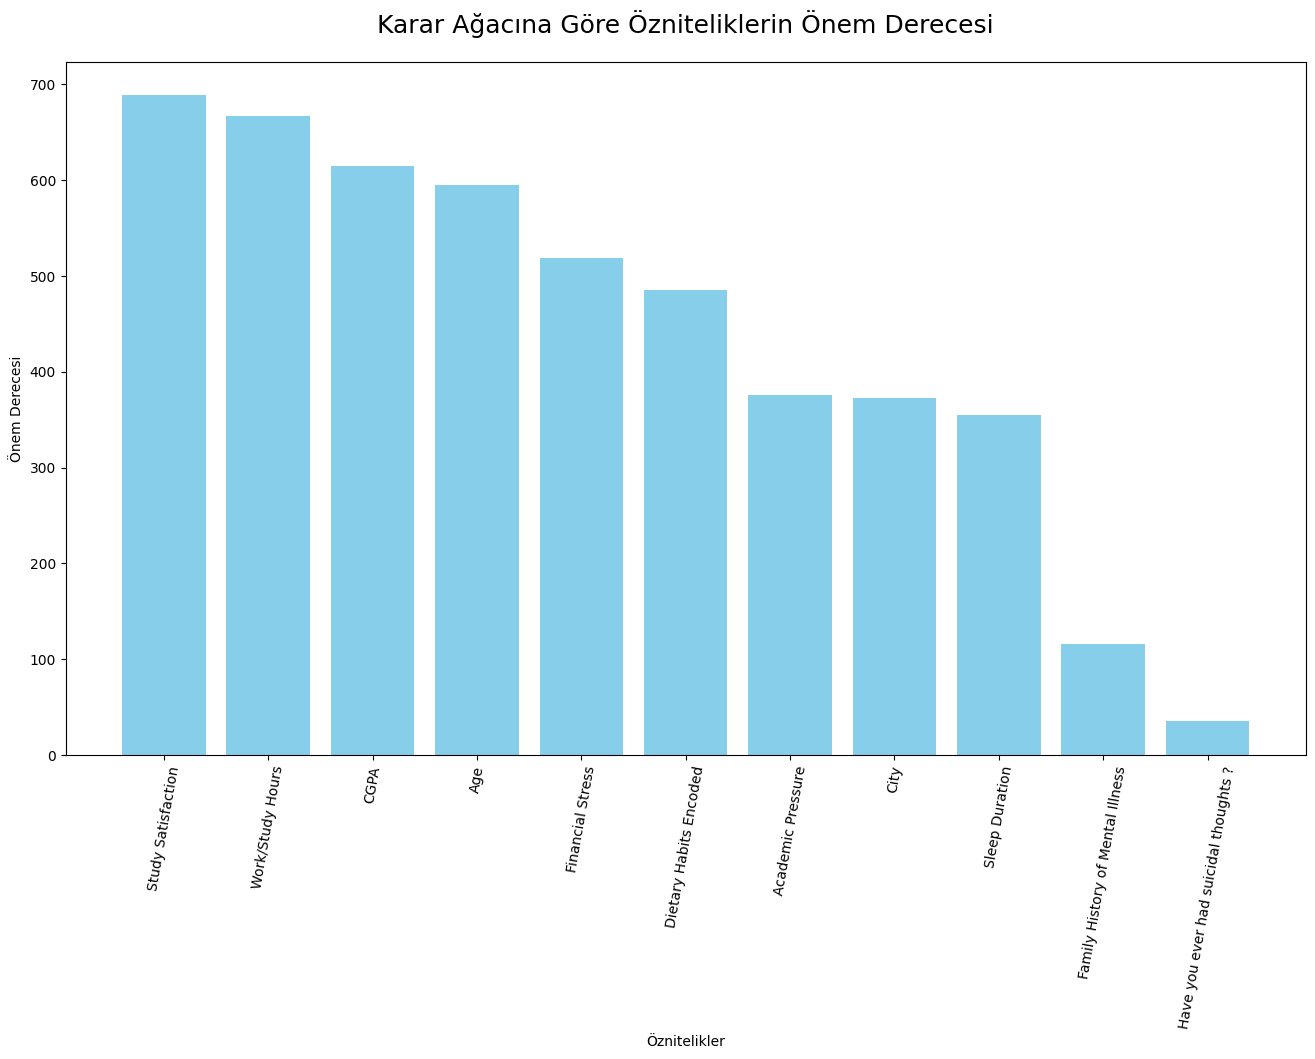

In [120]:
# Özellik önem derecelerini modelden al
feature_importances = lgbm_stdmodel.feature_importances_  # Trained model's feature importances
columns = X_train.columns  # Eğitim veri setindeki özellik adları

# En önemli 11 özelliği seç
sorted_indices = np.argsort(feature_importances)[::-1][:11]
sorted_importances = feature_importances[sorted_indices]
sorted_features = np.array(columns)[sorted_indices]

# Görselleştirme
plt.figure(figsize=(16, 9))
plt.title("Karar Ağacına Göre Özniteliklerin Önem Derecesi", y=1.03, size=18)
plt.bar(range(len(sorted_features)), sorted_importances, color="skyblue", align="center")
plt.xticks(range(len(sorted_features)), sorted_features, rotation=80)
plt.xlabel("Öznitelikler")
plt.ylabel("Önem Derecesi")
plt.show()